# Galactic Dynamics

## Potential Theory


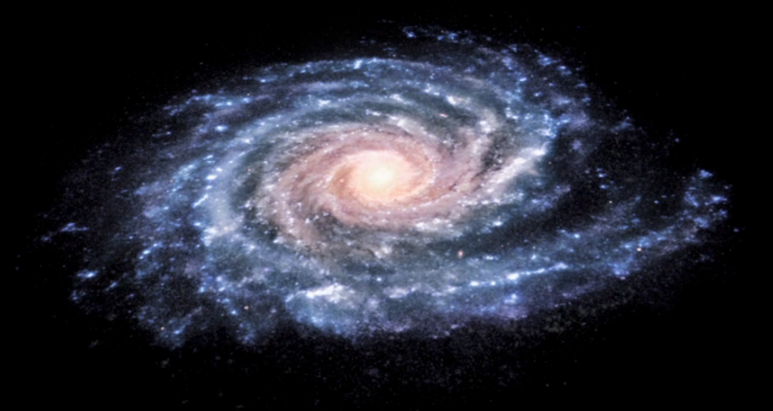


One of the main differences between Galactic dynamics and Planetary dynamics is that in the latter the motion is dominated by a central mass. Whereas in the Solar System 99% of the mass resides in the Sun, in a galaxy the situation is reversed. The central supermassive black hole of the Milky Way counts about a few 10$^6$ solar masses, whereas the galaxy itself has over 10$^{12}$ solar masses. Clearly, in a galaxy, it is not the central mass that dominates. The stuff in the galaxy (stars, gas and dark matter) generate a potential, and stuff moves individually under the influence of this common potential. Instead of adding up the gravity of every single one of the 10$^{11}$ stars in a galaxy, we will smooth their mass density on a scale that is small compared to the size of the galaxy, but big compared to the mean distance between stars. The potential is computed with this averaged mass density, and individual stars will be treated as test particle moving in this potential. 

### Gravitational Potential

What is the force $\mathbf{F}(\mathbf{x})$ on a mass $m_s$ at position $\mathbf{x}$ caused by the gravitational attraction of a distribution of mass with density $\rho(x^\prime) $

Sum all the small contributions

\begin{eqnarray}
d F(\mathbf{x}) &=& G m_s \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} d m(\mathbf{x}^\prime)\\
&=& G m_s \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \rho(\mathbf{x}^\prime) d^3\mathbf{x}^\prime
\end{eqnarray}

And integrate to find the full force, $F (\mathbf{x})= \int dF(\mathbf{x}) = m_s \mathbf{g}(x) $

Defining the acceleration

\begin{equation}
\mathrm{g}(\mathbf{x}) \equiv  G \int \rho(\mathbf{x}^\prime) \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3}  d^3\mathbf{x}^\prime
\end{equation}

If we define the gravitational potential $\Phi(\mathrm{x})$

\begin{equation}
\Phi(\mathbf{x}) \equiv - G \int \frac{\rho(\mathbf{x}^\prime)}{|\mathbf{x}^\prime-\mathbf{x}|}  d^3\mathbf{x}^\prime
\end{equation}

Then we have that 

\begin{equation}
\mathbf{\nabla} \left( \frac{1}{|\mathbf{x}^\prime-\mathbf{x}|} \right) = \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} 
\end{equation}

and the gravitational acceleration can be written as 

\begin{equation}
\mathbf{g} = -\nabla \Phi
\end{equation}


In many situations, it is easier to find $\Phi$ and then take the gradient to find the acceleration. Plus, $\Phi$ is a scalar. 

### Poisson Equation


If we take the divergence of the acceleration

\begin{equation}
\nabla \cdot \mathbf{g}(\mathbf{x}) \equiv  G \int \rho(\mathbf{x}^\prime)  \nabla \cdot \left( \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \right) d^3\mathbf{x}^\prime
\end{equation}

We need to compute the divergence of the quantity in parentheses. Let us use SymPy for that

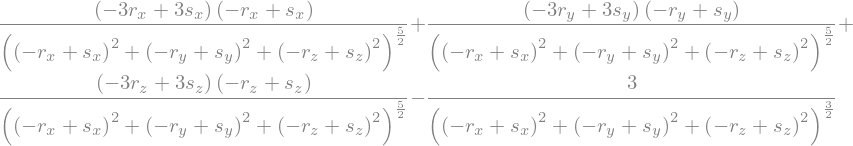

In [1]:
import sympy 
from sympy.physics.vector import ReferenceFrame, divergence
from sympy import init_printing, init_session

init_session(quiet=True)
init_printing() 

r  = ReferenceFrame('r')
s  = ReferenceFrame('s')

xc = r[0]*r.x + r[1]*r.y + r[2]*r.z
xp = s[0]*r.x + s[1]*r.y + s[2]*r.z

mod = sqrt((xp-xc) & (xp-xc))

divfunc = divergence((xp-xc)/mod**3,r)

divfunc



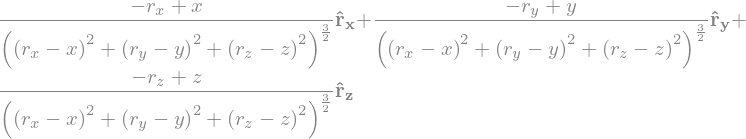

In [2]:
import sympy 
from sympy import init_printing,init_session
from sympy.physics.vector import ReferenceFrame,gradient
from sympy import Symbol

init_session(quiet=True)
init_printing

r = ReferenceFrame('r')

xc  = r[0]*r.x + r[1]*r.y + r[2]*r.z

x=Symbol('x')
y=Symbol('y')
z=Symbol('z')

xp  = x*r.x + y*r.y + z*r.z

mod = sqrt((xc-xp) & (xc-xp))

gradient(1/mod,r)




So, we have that 

\begin{equation}
\nabla \cdot \left( \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \right) = \frac{3(\mathbf{x}^\prime-\mathbf{x})(\mathbf{x}^\prime-\mathbf{x})}{|\mathbf{x}^\prime-\mathbf{x}|^5} - \frac{3}{|\mathbf{x}^\prime-\mathbf{x}|^3}
\end{equation}

When $\mathbf{x}^\prime\neq \mathbf{x}$, the denominators are nonzero, and the expression cancels. Indeed, simplifying the expression we obtained in sympy

In [3]:
simplify(divfunc)

This means that any contribution to $\nabla\cdot \mathbf{g}$ must come from the point $\mathbf{x}=\mathbf{x}^\prime$. We can integrate then in a small region of radius $h$ around this point, and make $h$ as small as we want. When $h$ is sufficiently small, the density is constant in the sphere of radius $h$, and we can remove it from the integral  

\begin{equation}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) =  G \rho(\mathbf{x}^\prime)\int_{|\mathbf{x}^\prime-\mathbf{x}|\leq h}   \nabla \cdot \left( \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \right) d^3\mathbf{x}^\prime
\end{equation}

We can now change the gradient from $x$ to $x^\prime$

\begin{equation}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) =  - G \rho(\mathbf{x}^\prime)\int_{|\mathbf{x}^\prime-\mathbf{x}|\leq h}   \nabla_{x^\prime} \cdot \left( \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \right) d^3\mathbf{x}^\prime
\end{equation}

Apply Gauss theorem to remove the divergence, rendering it an area integral on the surface of radius $h$

\begin{equation}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) =  -G \rho(\mathbf{x}^\prime)\int_{|\mathbf{x}^\prime-\mathbf{x}|= h} \frac{(\mathbf{x}^\prime - \mathbf{x})}{h^3} d^2\mathbf{S}^\prime
\end{equation}

The area element $A=\int d^2\mathrm{S}^\prime$ on the surface of a sphere of radius $R$ is related to the solid angle $\Omega$. 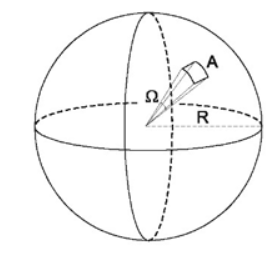

Thus, $|d^2\mathrm{S}^\prime| = h^2 d\Omega$. To keep it vectorial, $h = |\mathbf{x}^\prime-\mathbf{x}|$, and thus  $d^2\mathrm{S}^\prime = (\mathbf{x}^\prime-\mathbf{x})h d\Omega$

The integral then becomes 

\begin{equation}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) =  -G \rho(\mathbf{x}^\prime)\int \frac{1}{h^2}(\mathbf{x}^\prime - \mathbf{x})\cdot (\mathbf{x}^\prime-\mathbf{x}) d\Omega
\end{equation}

And because $(\mathbf{x}^\prime - \mathbf{x})\cdot (\mathbf{x}^\prime-\mathbf{x}) = h^2$

\begin{eqnarray}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) &=&  -G \rho(\mathbf{x}^\prime)\int d\Omega\\
&=&-4\pi G \rho
\end{eqnarray}

Substituting now $\mathbf{g} = -\nabla\Phi$, we obtain $\bf{Poisson's \ equation}$ relating the potential and the density

\begin{equation}
\boxed{\boxed{\nabla^2\Phi=  4\pi G \rho}}
\end{equation}

### Spherically symmetric potentials

Isaac Newton proved two theorems for spherically symmetric systems, that great simplify obtaining their potential.

##### Newton's first theorem

A body that is inside a spherical shell of matter experiences no net gravitational force from that shell. 


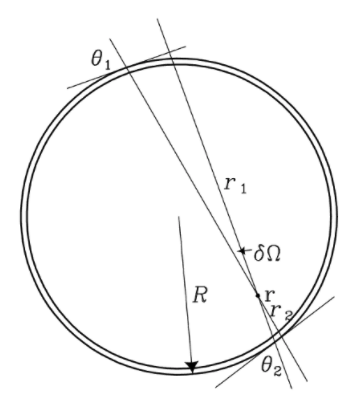


This is geometrically seen from the figure above. Considering the cone of the solid angle $\delta \Omega$ and centered at $r$. The cone intersects the shell at two locations, of angular extent $\theta_1=\delta \Omega/r_1^2$ and $\theta_2=\delta \Omega/r_2^2$. The $dm_1$ and $dm_2$ contained in these arcs are thus in the ratio  


\begin{equation}
\frac{dm_1}{dm_2} = \left(\frac{r_1}{r_2}\right)^2
\end{equation}

Hence

\begin{equation}
\frac{dm_2}{r_2^2} = \frac{dm_1}{r_1^2} 
\end{equation}

so at point $r$ the acceleration is equal from opposite directions. Integrating over all directions the sum is zero, proving that there is no net force experienced inside the spherical symmetric shell. 

As a consequence of the theorem, if the acceleration $\mathbf{g}=-\nabla\Phi$ is zero, then the potential $\Phi$ is constant. So, we can take the potential at any point inside the shell and it will give the potential anywhere. For convenience, we choose the center. Any mass distribution is at a distance $R$, so the potential is 

\begin{equation}
\boxed{\Phi(R) = - \frac{GM}{R}}
\end{equation}


##### Newton's second theorem

The gravitational force on a body that lies outside a spherical shell of matter is the same as it would be if all the shell's matter were concentrated into a point at its center. 





Poisson's equation $\nabla^2\Phi=  4\pi G \rho$ in case of a spherical system takes a simpler form. 

\begin{equation}
\frac{1}{r^2}\frac{\partial}{\partial r} \left( r^2 \frac{\partial \Phi}{\partial r} \right) = 4\pi G \rho(r)
\end{equation}

Multiply both sides by $r^2$ and integrate it once in limits going from $0$ to $r$

\begin{equation}
\left. r^{\prime 2} \frac{\partial \Phi}{\partial r^\prime} \right\vert_0^{r} = 4\pi G \int_0^r \rho(r^\prime) r^{\prime 2} dr^\prime 
\end{equation}

The integral in the RHS is the mass enclosed by the Gaussian surface. At $r=0$ the lower term in the LHS cancels (if $d\Phi/dr$ at $r=0$ is finite), and hence  

\begin{equation}
\frac{\partial \Phi(r)}{\partial r}  = \frac{GM}{r^2} 
\end{equation}

Integrating again in $r$

\begin{equation}
\Phi(r) = -\frac{GM}{r}
\end{equation}

which is identical to the potential if all the shell mass was concentrated as a point mass.

### Gravitational Potential Energy

Given $\rho$ and $\Phi$, what is the total gravitational energy $W$ of the system?

By definition, $\Phi$ is the potential energy of a unit mass at the position $\mathbf{x}$. If we bring in additional mass $\delta m$ from infinity to position $\mathbf{x}$, the work done is $\delta m \Phi(\mathbf{x})$. This contributes an extra density $\delta \rho$, and the change in potential energy is 

\begin{equation}
\delta W =  \int \Phi(\mathbf{x}) \ \delta \rho \ dV
\end{equation}

The change in density produces, according to Poisson's equation, a change in the potential 

\begin{equation}
\nabla^2 \left(\delta \Phi\right)  =  4\pi G \delta \rho 
\end{equation}


We substitute that in the equation for $\delta W$ 


\begin{equation}
\delta W =  \frac{1}{4\pi G}\int \Phi \ \nabla^2 \left(\delta \Phi\right) \ dV
\end{equation}

Because the Laplacian is the divergence of the gradient 


\begin{equation}
\delta W =  \frac{1}{4\pi G}\int \Phi \ \nabla \cdot \left[ \nabla \left( \delta \Phi\right)\right] \ dV
\end{equation}

We apply Gauss' theorem here to remove the divergence 

\begin{equation}
\delta W =  \frac{1}{4\pi G}\int \Phi \ \nabla \left( \delta \Phi\right) \cdot d\mathbf{A} - \frac{1}{4\pi G}\int \nabla \Phi \cdot \nabla \left( \delta \Phi\right) \ dV
\end{equation}

The surface integral vanishes because the potential is zero at infinity. The second integral remains 


\begin{equation}
\delta W =  - \frac{1}{4\pi G}\int \nabla \Phi \cdot \nabla \left( \delta \Phi\right) \ dV
\end{equation}

Because 

\begin{equation}
\nabla \Phi \cdot \nabla \left( \delta \Phi\right) = \frac{1}{2}\delta \left(\nabla \Phi \cdot \nabla \Phi \right) = \frac{1}{2}\delta \vert \left(\nabla \Phi \right) \vert^2
\end{equation}

we find 

\begin{equation}
\delta W =  - \frac{1}{8\pi G}\delta \left(\int \vert \left(\nabla \Phi \right) \vert^2 \ dV \right)
\end{equation}

And summing all the contributions $\delta W$, we have the total gravitational energy 

\begin{equation}
 W =  - \frac{1}{8\pi G} \int \vert \left(\nabla \Phi \right) \vert^2 \ dV 
\end{equation}


Another form of this expression involves $\Phi$ and $\rho$. Integrating by parts 

\begin{equation}
\int  \left(\nabla \Phi \right)^2  \ dV = -\int \Phi \nabla^2 \Phi \ dV
\end{equation}

and using Poisson's equation again, $\nabla^2\Phi = 4\pi G \rho$

\begin{equation}
 W =  \frac{1}{2} \int \rho \Phi \ dV 
\end{equation}




### Examples of spherically symmetric potential-density pairs

#### Homogeneous sphere

If the density is constant inside a radius R and zero outside 

\begin{equation}
\rho = \left\{ \begin{array}{cc} 
\rho_0 & \mathrm{if} \ r \leq R \\
0 & \mathrm{if} \ r > R
\end{array} \right.
\end{equation}

the mass distribution is 

\begin{equation}
M(r) =  4\pi \int_0^{r} \rho(r^\prime) \ r^{\prime 2} \ dr^\prime 
\end{equation}

which integrates to 

\begin{equation}
M(r) = \frac{4\pi \rho_0}{3}\times\left\{ \begin{array}{cc} 
r^2 & \mathrm{if} \ r \leq R \\
R^3 & \mathrm{if} \ r > R
\end{array} \right.
\end{equation}


For the potential, if we are outside the sphere, it is, according to Newton's second theorem, simply $-GM/r$. Inside the sphere, we need to integrate. The potential can be considered to be a contribution of the different shells of mass $dM(r) = 4\pi \rho(r) r^2 dr$. Because of Newton's second theorem, we can separate the mass distribution into inside and outside the radius r, and inside it we consider the mass as a point mass 

\begin{equation}
\Phi(r) = -\frac{G M(r)}{r} - G\int_r^\infty \frac{dM(r^\prime)}{r^\prime} 
\end{equation}


which yields 


\begin{eqnarray}
\Phi(r) &=& -\frac{4\pi}{3} G\rho_0 r^2 - 4\pi G \rho_0 \int_r^R r^\prime dr^\prime \\
&=& -2\pi G \rho_0 \left( R^2 - \frac{r^2}{3}\right)
\end{eqnarray}

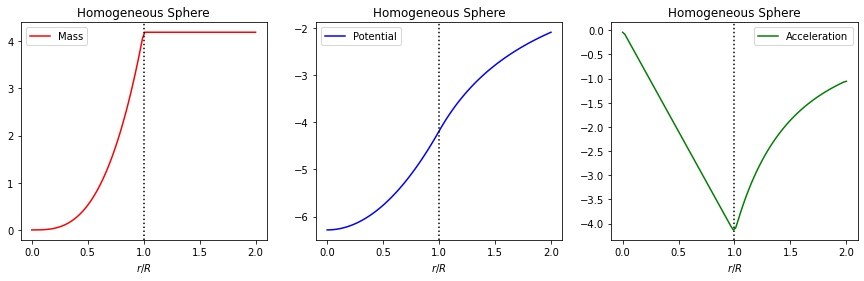

In [4]:
import numpy as np
import pylab as plt
import matplotlib 
%matplotlib inline  

R = 1
G = 1
rho0 = 1
n = 100
M = 4*np.pi/3 * R**3

r = np.linspace(0,2*R,n)
Phi = np.zeros(n)
Mass = np.zeros(n)
g = np.zeros(n)

for i in range(n):
    if (r[i] <= R):
        Phi[i] = -2*np.pi*G*(R**2 - r[i]**2/3)
        Mass[i] = 4*np.pi/3 * r[i]**3
    else: 
        Phi[i] = -G*M/r[i]
        Mass[i] = M

        
g = -np.gradient(Phi)/np.gradient(r)

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,4),sharex=True)

axs[0].plot(r,Mass,label='Mass',color='red')
axs[1].plot(r,Phi,label='Potential',color='blue')
axs[2].plot(r,g,label='Acceleration',color='green')

for i, ax in enumerate(fig.axes):
    ax.legend()
    ax.set_xlabel(r'$r/R$')
    ax.axvline(1,linestyle=':',color='black')
    ax.set_title("Homogeneous Sphere")
    
    
plt.show()    

### Dark halos

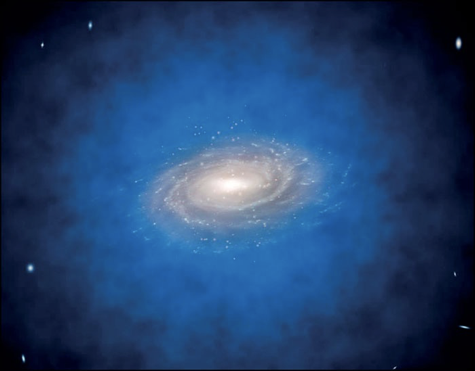


Dark matter does not interact with matter except gravitationally. As a result, any loss of energy is negligible, and the orbit of a dark matter particle does not settle into a disk like stars and gas. So, the dark matter distribution around a galaxy should be spherically symmetric. Much attention has been devoted to models where the density is given by 


\begin{equation}
\boxed{
\rho(r) = \frac{\rho_0}{(r/a)^\alpha (1+r/a)^{\beta-\alpha}}
}
\end{equation}


The model with $\alpha = 1$ and $\beta=3$ is called the ${\bf NFW \ model}$ (after Navarro, Frenk, & White, 1995)

\begin{equation}
\rho(r) = \frac{\rho_0}{(r/a) (1+r/a)^2}
\end{equation}


Accordingly, the mass of the halo with this density distribution is 

\begin{equation}
M(r) =  4\pi \int_0^{r} \rho(r^\prime) \ r^{\prime 2} \ dr^\prime 
\end{equation}


The mass M(r) enclosed by a sphere of radius r is M(r)= 


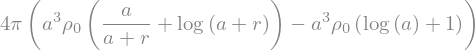

In [5]:
import sympy as sp 
from sympy import integrate

rho0 = sp.Symbol('rho0')
rp = sp.Symbol('rp')
r = sp.Symbol('r')
a = sp.Symbol('a')

rho = rho0/((rp/a)*(1+rp/a)**2)

#rho

print("The mass M(r) enclosed by a sphere of radius r is M(r)= ")
mass=4*sp.pi*integrate(rho*rp**2,(rp,0,r))

mass



The mass $M(r)$ enclosed by a sphere of radius $r$ is

\begin{equation}
\boxed{
M(r) = 4\pi \rho_0 a^3  \left[ \ln\left(1+r/a\right)  -\frac{r/a}{(1+r/a)} \right]
}
\end{equation}


The gravitational potential is given by 

\begin{equation}
\Phi = -G\int_r^{\infty} \frac{M(r)}{r^2} dr
\end{equation}

The potential Phi(r) of a NFW dark matter halo is:


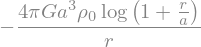

In [6]:
import sympy as sp 
from sympy import integrate

rho0 = sp.Symbol('rho0')
rp = sp.Symbol('rp')
r = sp.Symbol('r')
a = sp.Symbol('a')
G= sp.Symbol('G')

mass = 4*sp.pi*a**3*rho0* (sp.log(1+rp/a) - (rp/a)/(1+rp/a))

print("The potential Phi(r) of a NFW dark matter halo is:")

Phi = integrate(-G*mass/rp**2,(rp,r,infty))

Phi




The potential $\Phi(r)$ of a NFW dark matter halo is

\begin{equation}
\boxed{
\Phi = -4\pi G \rho_0 a^2\frac{\ln(1+r/a)}{r/a}
}
\end{equation}

and the acceleration is found by taking the gradient. 


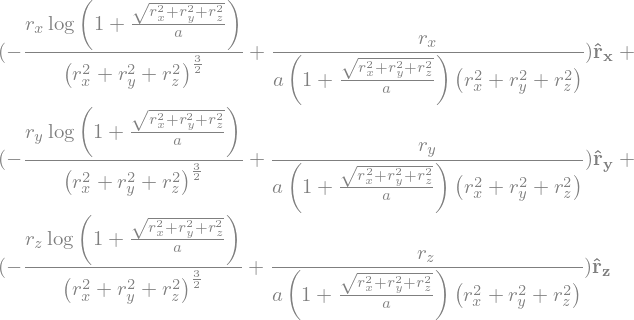

In [7]:
import sympy 
from sympy.physics.vector import ReferenceFrame, gradient
from sympy import init_printing, init_session

init_session(quiet=True)
init_printing() 

r  = ReferenceFrame('r')

R = r[0]*r.x + r[1]*r.y + r[2]*r.z

mod = sp.sqrt(R & R)

C = 1 #4*pi*G*a**3*rho0

Phi = -C/mod * sp.log(1+mod/a) 

g = -gradient(Phi,r)

g


The circular velocity is 


\begin{equation}
v_c^2 = R\frac{\partial \Phi}{\partial r}
\end{equation}



The potential Phi(r) of a NFW dark matter halo is:


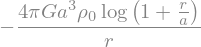

In [8]:
import sympy as sp 
from sympy import integrate

rho0 = sp.Symbol('rho0')
rp = sp.Symbol('rp')
r = sp.Symbol('r')
a = sp.Symbol('a')
G= sp.Symbol('G')

mass = 4*sp.pi*a**3*rho0* (sp.log(1+rp/a) - (rp/a)/(1+rp/a))

print("The potential Phi(r) of a NFW dark matter halo is:")

Phi = integrate(-G*mass/rp**2,(rp,r,infty))

Phi


And the circular velocity is:


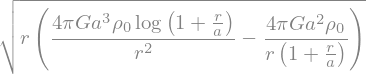

In [9]:
vc = sp.sqrt(r * sp.diff(Phi,r))

print("And the circular velocity is:")

vc

<ipython-input-10-263de4f115a9>:15: RuntimeWarning: invalid value encountered in true_divide
  Phi = -4*np.pi*G*a**3*rho0*np.log(1 + r/a)/r


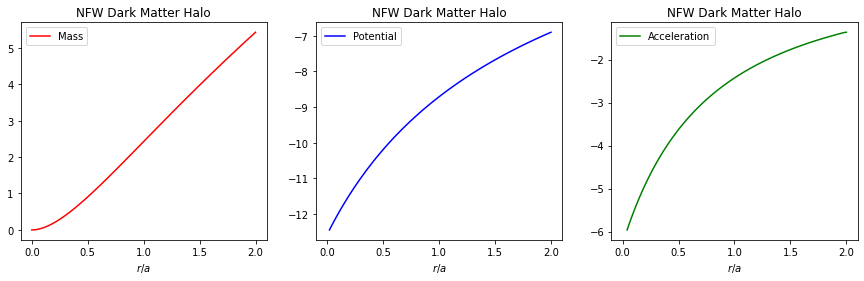

In [10]:
import numpy as np
import pylab as plt
import matplotlib 
%matplotlib inline  


a = 1
G = 1
rho0 = 1
n = 100

r = np.linspace(0,2*a,n)

Mass = 4*np.pi*a**3*rho0* (np.log(1+r/a) - (r/a)/(1+r/a))
Phi = -4*np.pi*G*a**3*rho0*np.log(1 + r/a)/r        
g = -np.gradient(Phi)/np.gradient(r)

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,4),sharex=True)

axs[0].plot(r,Mass,label='Mass',color='red')
axs[1].plot(r,Phi,label='Potential',color='blue')
axs[2].plot(r,g,label='Acceleration',color='green')

for i, ax in enumerate(fig.axes):
    ax.legend()
    ax.set_xlabel(r'$r/a$')
    ax.set_title("NFW Dark Matter Halo")
    
    
plt.show()    

### Non-spherical potentials

Apart from the halo, little else in a galaxy is spherically symmetric. The disk is essentially flat, and the bulge is ellipsoidal in shape. Elliptical galaxies are mosty a bulge and, thus, also ellipsoidal. Irregular galaxies come in any shape and, for those, the potential should be derived numerically. Let us consider here the potential for disks and ellipsoidals. With these three (spherical, ellipsoidal, flattened), we will have the potential of the three components of a spiral galaxy (halo, bulge, disk) and can compute the orbits of stars with reasonable realism.

In general, non-spherical systems are much more difficult to handle. Still, we can solve some simple and astronomically interesting cases. 

#### Infinite disk


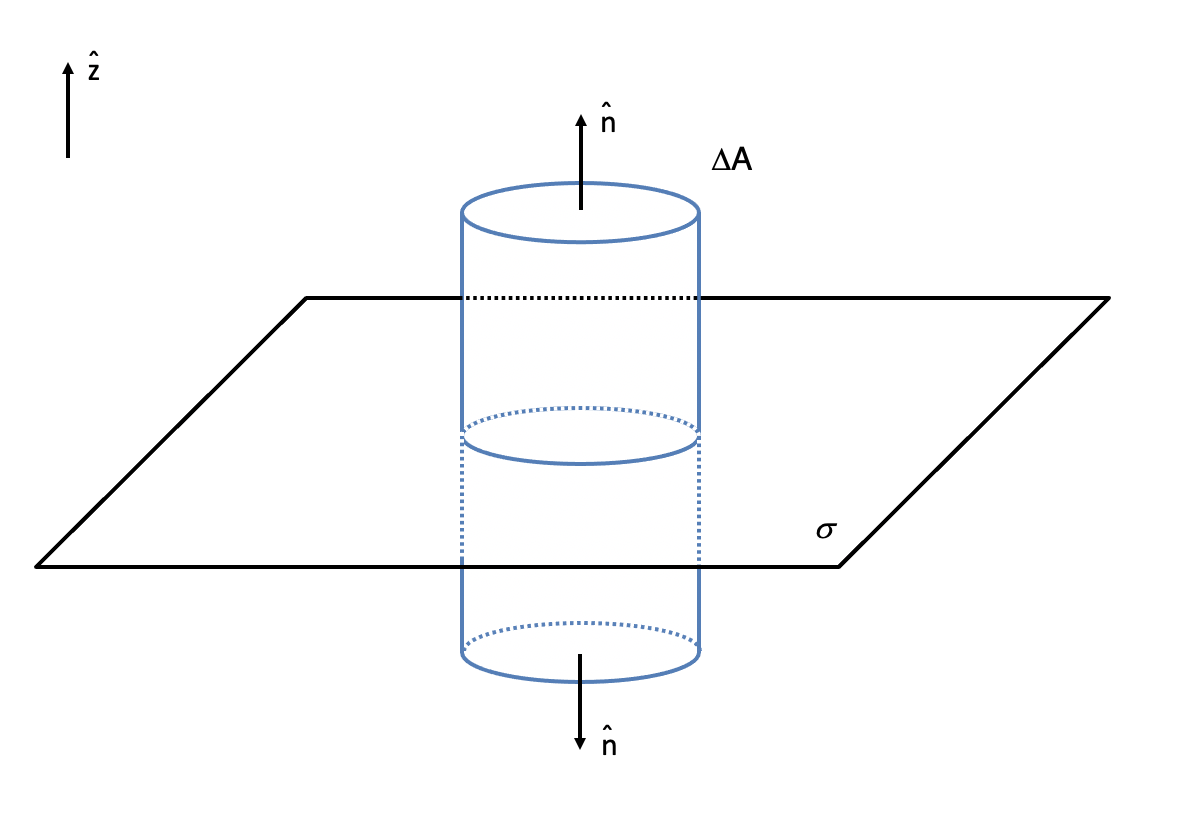


A simple model for stellar disks. An infinite sheet of mass with constant surface density $\sigma$. Because of the plane symmetry, the only non-zero component of $\mathbf{g}$ is in the vertical direction, $g_z$. Using Gauss law to find it 

\begin{equation}
\oint \mathbf{g} \cdot d\mathbf{A} = \int g_z dA =  -4\pi G M 
\end{equation}

the enclosed mass is $M = \sigma \Delta A$. Thus, 

\begin{equation}
\int g_z dA  = -4\pi G \sigma \Delta A  
\end{equation}

and for constant acceleration, $\int g_z dA = g_z \times 2 \Delta A $, leading to 

\begin{equation}
g_z  = -2\pi G \sigma  
\end{equation}

That is 

\begin{equation}
\mathbf{g}  = -2\pi G \sigma \ \hat{\mathbf{n}}
\end{equation}

where $\hat{\mathbf{n}}$ is the normal to the surface, that is, $\hat{\mathbf{n}} = \hat{\mathbf{z}}$ if $z>0$, and $\hat{\mathbf{n}} = -\hat{\mathbf{z}}$ if $z<0$.  Another way to write this is 

\begin{equation}
\mathbf{g}  = -2\pi G \sigma \ \frac{\mathbf{z}}{|z|}
\end{equation}

Integrate this now to find 

\begin{equation}
\frac{d\Phi}{dz}  = -g_z \quad \longleftrightarrow \quad\Phi = 2\pi G \sigma |z|
\end{equation}


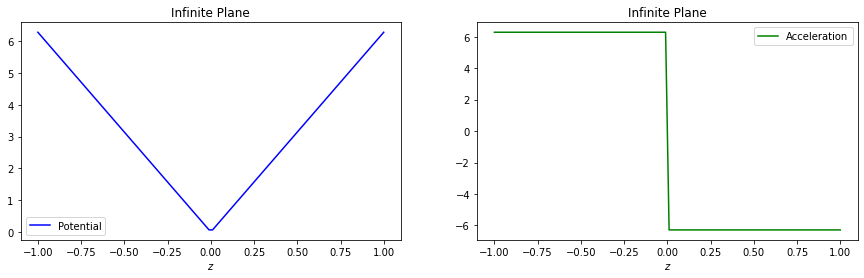

In [11]:
import numpy as np
import pylab as plt
import matplotlib 
%matplotlib inline  


G = 1
sigma0 = 1
n = 100

z = np.linspace(-1,1,n)

Phi = 2*np.pi*G*sigma0*np.abs(z)
g = -2*pi*G*sigma0*z/np.abs(z)

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15,4),sharex=True)

axs[0].plot(z,Phi,label='Potential',color='blue')
axs[1].plot(z,g,label='Acceleration',color='green')

for i, ax in enumerate(fig.axes):
    ax.legend()
    ax.set_xlabel(r'$z$')
    ax.set_title("Infinite Plane")
    
plt.show()    

Notice that we can find the same result via the Poisson equation. Consider the density distribution being $\rho(R,z) = \sigma(R) \delta(z)$

\begin{equation}
\nabla^2 \Phi  = 4\pi G \sigma \delta(z)
\end{equation}

Expanding the Laplacian 

\begin{equation}
\frac{1}{R}\frac{\partial}{\partial R} \left(R \frac{\partial\Phi}{\partial R}\right) +  \frac{\partial^2\Phi}{\partial z^2}  = 4\pi G \sigma \delta(z)
\end{equation}


Because of the very flattened distribution, the LHS is dominated by the $z$ term around the midplane, where the mass distribution is. We ignore the first term and write 

\begin{equation}
\frac{\partial^2\Phi}{\partial z^2}  \approx 4\pi G \sigma \delta(z)
\end{equation}


This is an important insight, that applies to almost any thin disk: ${\bf Even \ if \ the \ density \ varies \ in \ radius, \ the \ vertical \ variation \ in \ a \ flattened \ disk \ is \ so \ much \ more \ extreme \ that \ it \ dominates \ the \ potential.}$ 

We now integrate it twice in $z$. Integrating once  

\begin{equation}
\int_{-\infty}^{\infty} \frac{\partial^2 \Phi}{\partial z^2} dz  = 4\pi G \sigma \int_{-\infty}^\infty  \delta(z) dz
\end{equation}


The integration in the RHS removes the Dirac delta 

\begin{equation}
\int_{-\infty}^{\infty} \frac{\partial^2 \Phi}{\partial z^2} dz  = 4\pi G \sigma 
\end{equation}


Since most of the contribution arises from $z=0$, let us integrate the LHS in a small region around the midplane, from -$z$ to $z$

\begin{equation}
\int_{-z}^{z} \frac{\partial^2 \Phi}{\partial z^{\prime 2}} dz^\prime  = 4\pi G \sigma 
\end{equation}

The LHS integral is obviously the 1st derivative of $\Phi$ 

\begin{equation}
\frac{\partial \Phi(z)}{\partial z} - \frac{\partial \Phi(-z)}{\partial z}   = 4\pi G \sigma 
\end{equation}


And because the potential is symmetric, $\Phi^\prime(-z) = \Phi^\prime(z)$, so 

\begin{equation}
\frac{\partial \Phi(z)}{\partial z} = 2\pi G \sigma 
\end{equation}

and integrating again 

\begin{equation}
\boxed{\Phi(z)  = 2\pi G \sigma |z|}
\end{equation}


#### Thick disk

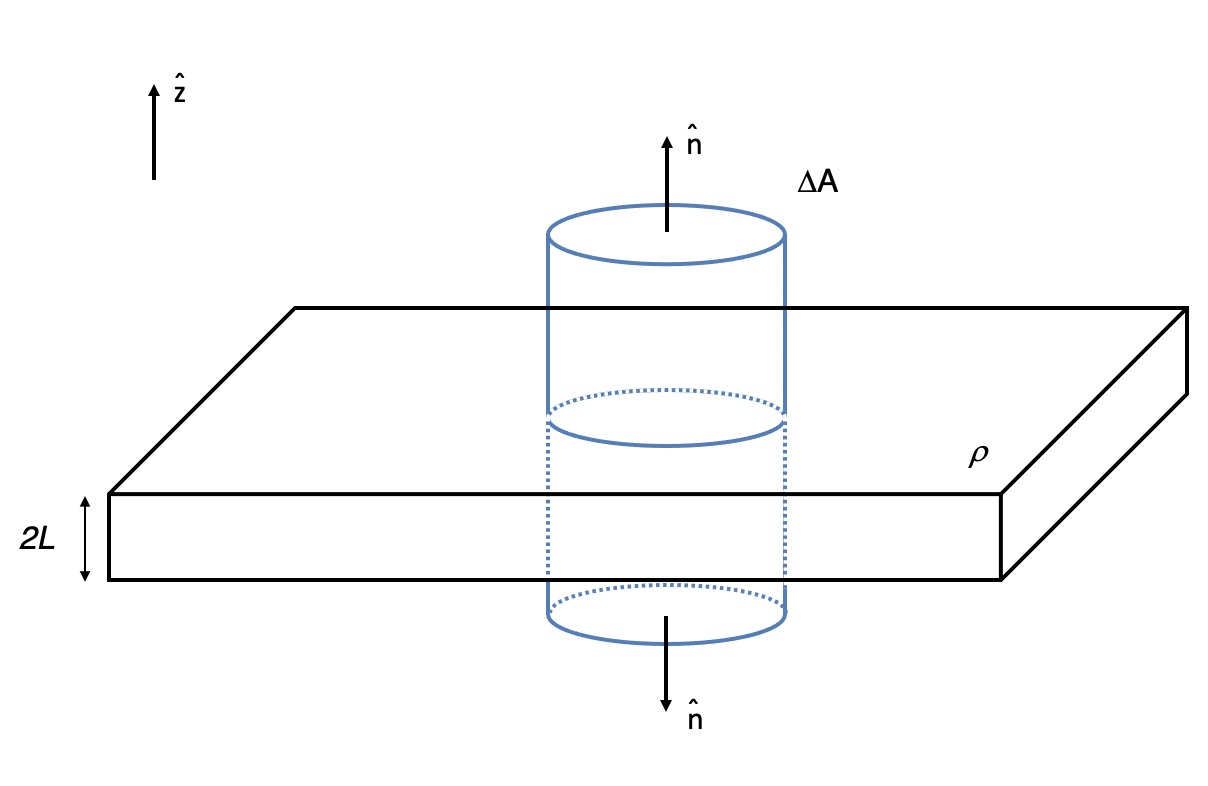


A thick disk has constant density $\rho_0$ within a thickness $2L$, the disk height. The column density is $2\rho_0 L$. Due to symmetry, again the acceleration is only in z. We can again apply Gauss' law 

\begin{equation}
\oint \mathbf{g} \cdot d\mathbf{A} = \int g_z dA =  -4\pi G M 
\end{equation}

But now the mass distribution is 

\begin{equation}
M(z) = \left\{ \begin{array}{cc} 
2\rho_0 L  \Delta A & \mathrm{if} \ |z| \geq L \\
2\rho_0 |z| \Delta A  & \mathrm{if} \ |z| < L
\end{array} \right.
\end{equation}

The acceleration in the positive $z$ direction is thus 

\begin{equation}
g(z) = -4\pi G \rho_0 \left\{ \begin{array}{cc} 
L & \mathrm{if} \ z \geq L \\
z & \mathrm{if} \ 0 < z < L
\end{array} \right.
\end{equation}

And the potential is found integrating this 


\begin{equation}
\Phi(z) = 2\pi G \rho_0 \left\{ \begin{array}{cc} 
2Lz & \mathrm{if} \ z \geq L \\
z^2  & \mathrm{if} \ 0 < z < L
\end{array} \right.
\end{equation}


So the potential is parabolic if inside the disk, and linear if outside. 


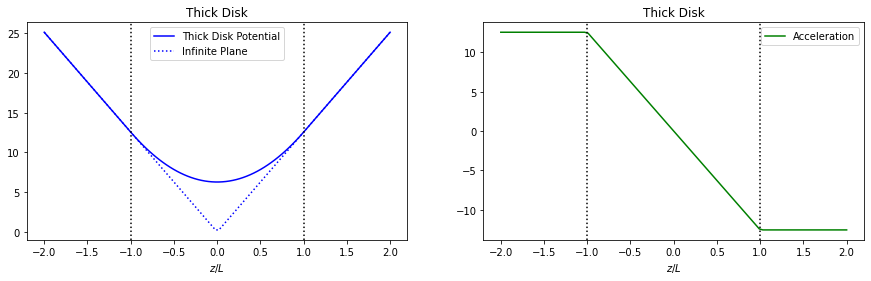

In [12]:
import numpy as np
import pylab as plt
import matplotlib 
%matplotlib inline  


G = 1
rho0 = 1
n = 100
L = 1

z = np.linspace(-2*L,2*L,n)

Phi = np.zeros(n)
g = np.zeros(n)

Phi0 = 2*np.pi*G*rho0*L**2

for i in range(n):
    if (abs(z[i]) <= L):
        Phi[i] = 2*np.pi*G*rho0*z[i]**2 + Phi0
        g[i] = -4*np.pi*G*rho0*z[i] 
    else: 
        Phi[i] = 4*np.pi*G*rho0*L*abs(z[i])
        g[i] = -4*np.pi*G*rho0*L*sign(z[i])

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15,4),sharex=True)

axs[0].plot(z,Phi,label='Thick Disk Potential',color='blue')
axs[1].plot(z,g,label='Acceleration',color='green')


axs[0].plot(z,4*np.pi*G*rho0*L*abs(z),label='Infinite Plane',color='blue',linestyle='dotted')

for i, ax in enumerate(fig.axes):
    ax.legend()
    ax.set_xlabel(r'$z/L$')
    ax.set_title("Thick Disk")
    ax.axvline(1,linestyle=':',color='black')
    ax.axvline(-1,linestyle=':',color='black')
    
    
plt.show()


### Ellipsoidal potentials

Less trivial non-spherical distributions usually lead to messy algebra, and the potentials usually end up being described by special functions. Yet, ellipsoidal mass distributions are important in astrophysics, since the vertical direction in galaxies is in hydrostatic equilibrium, whereas the radial direction is centrifugally supported. That the radial and vertical direction are supported differently leads to non-axisymmetry, and ellipsoidal shapes, like the galactic bulge. Also, disks can be seen as extremely flattened ellipsoids, so the potential derived is applicable to them as well. 
    
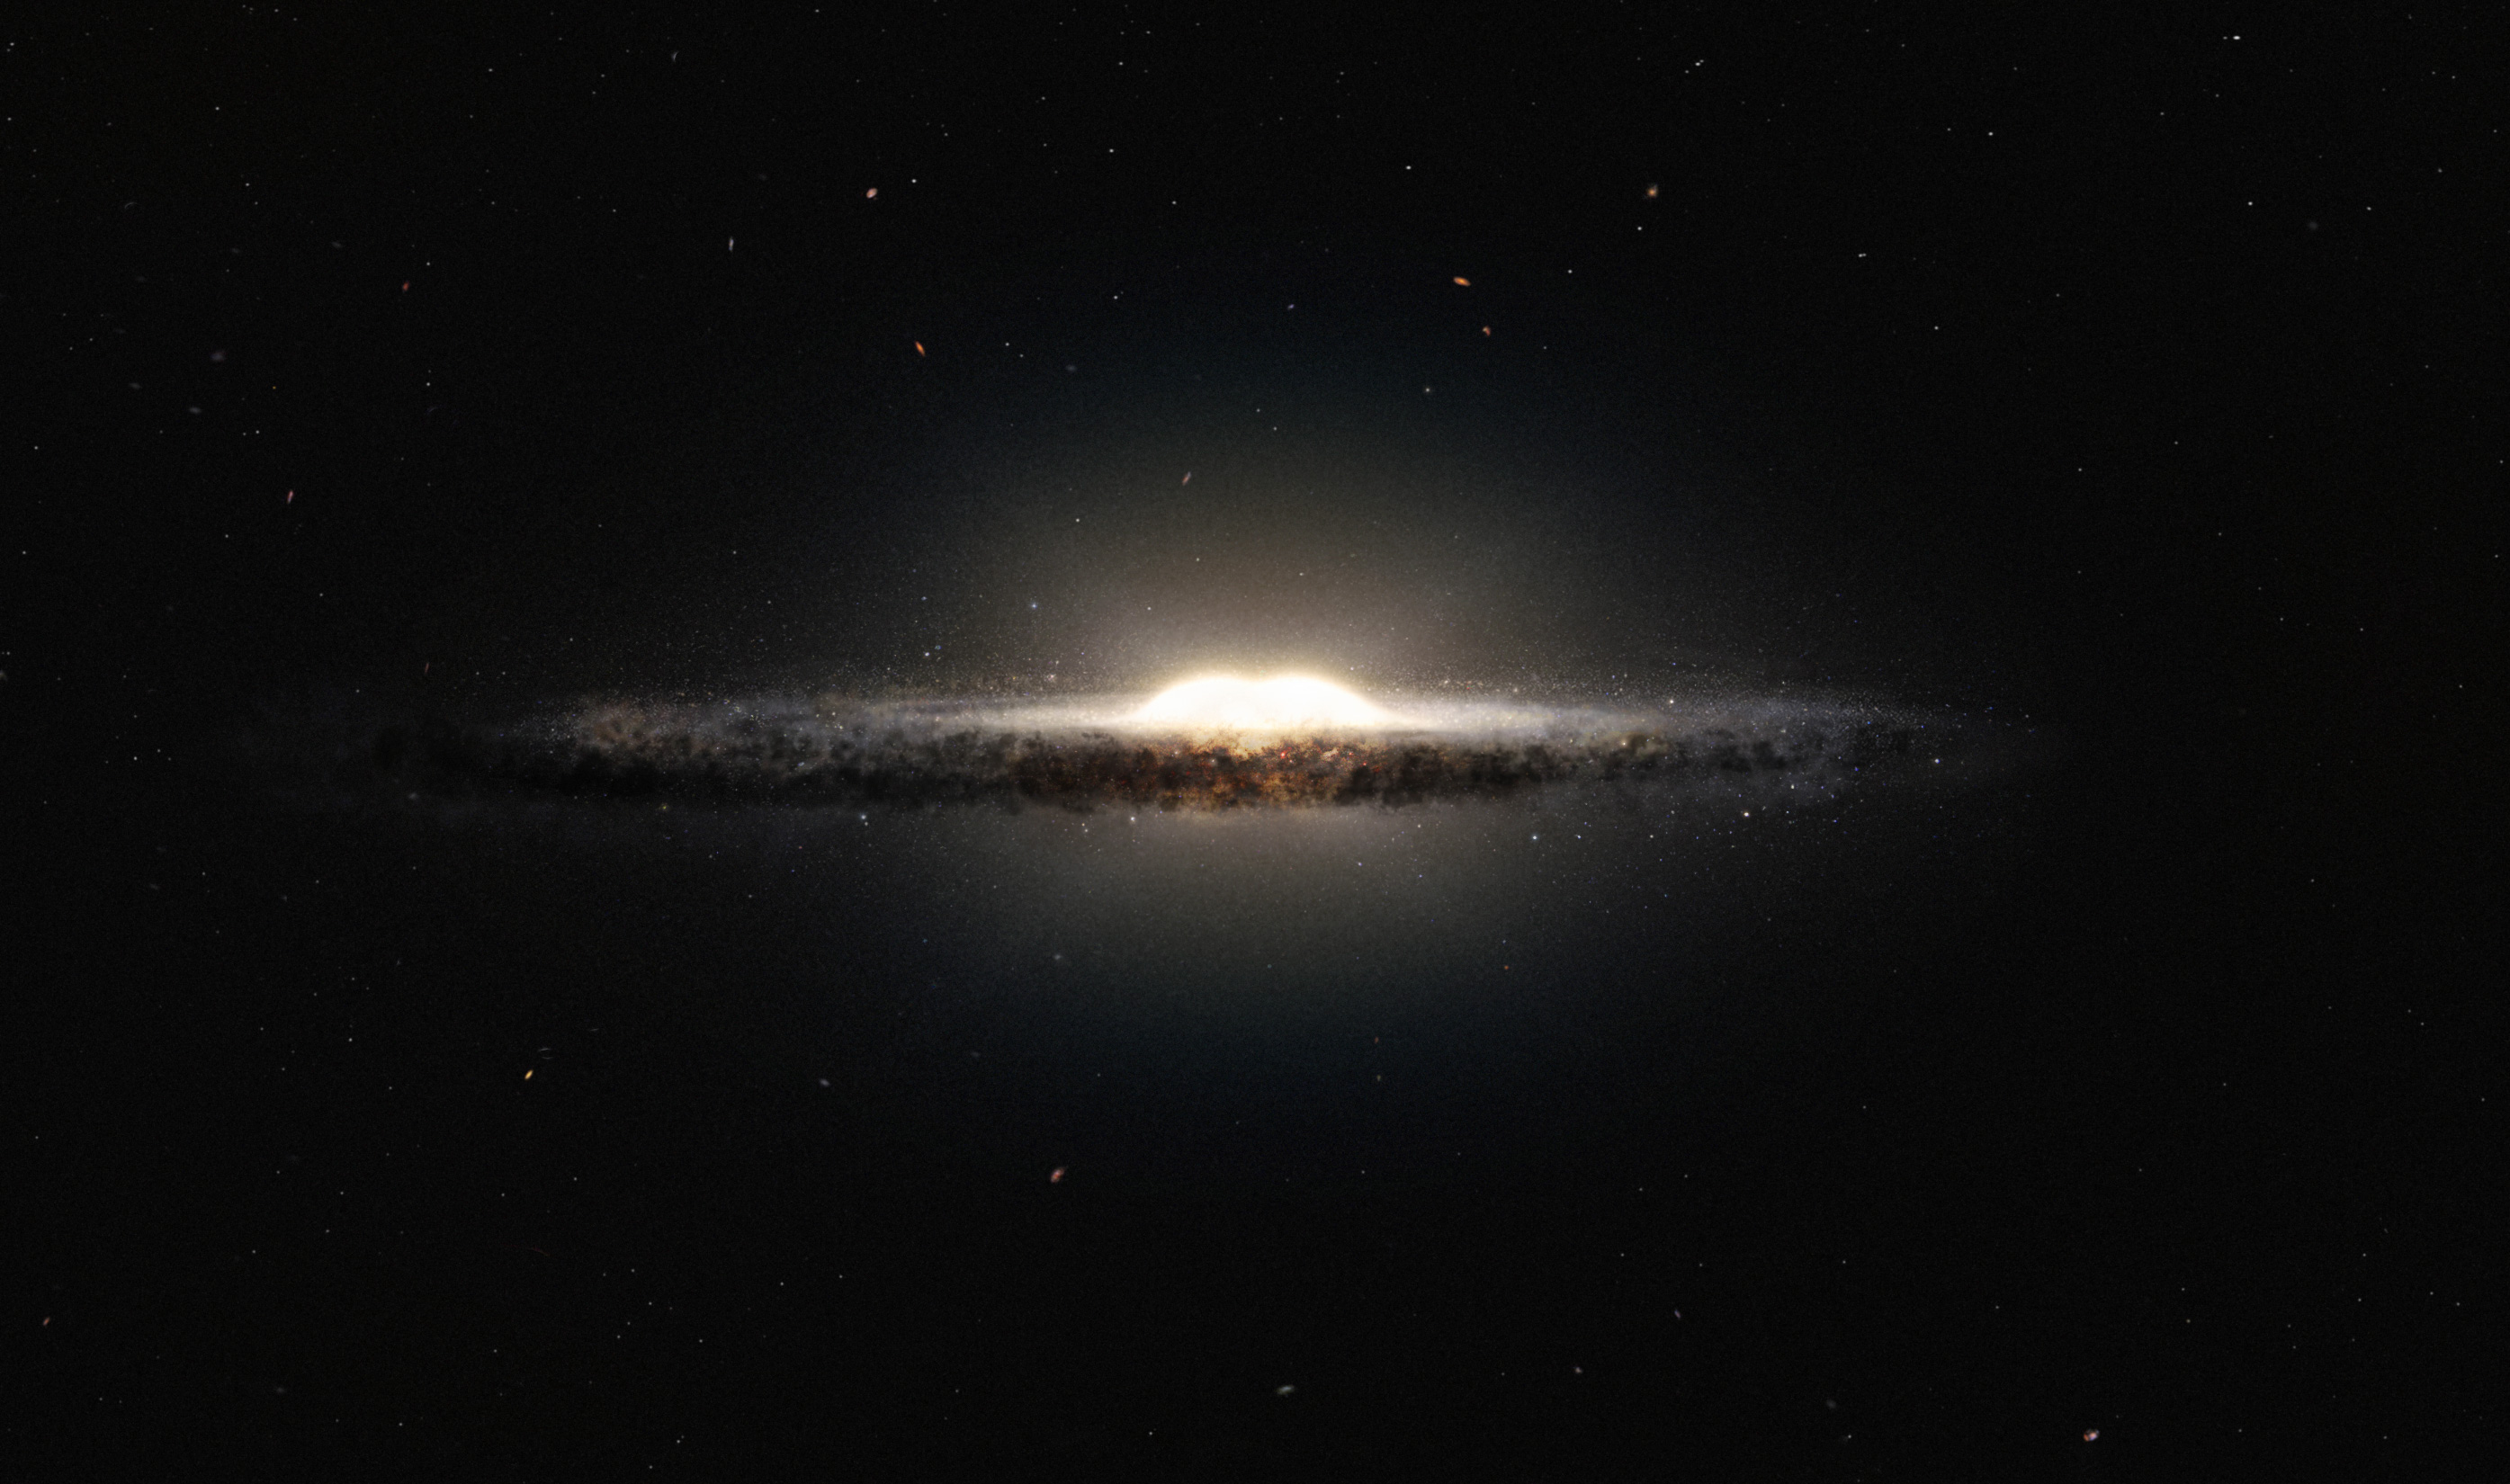


An ellipsoidal has shape given by

\begin{equation}
\frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} = \beta^2 \equiv \mathrm{const.}
\end{equation}

with the semi-axes $a$ and $b$ being similar, whereas $c$ is smaller. 


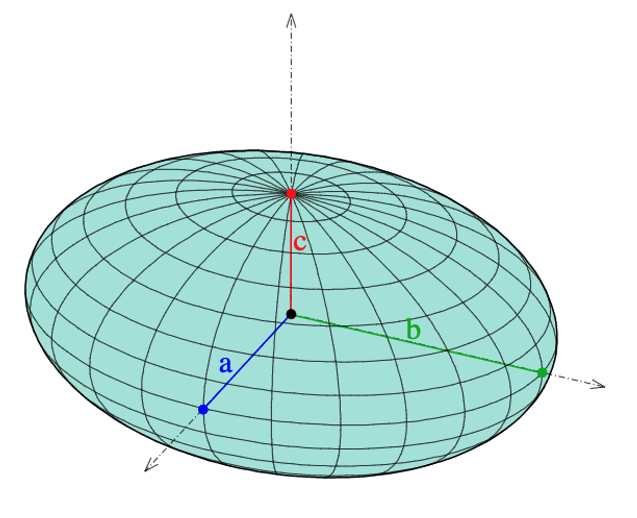



To compute their potential, we will do the same procedure as we did for spherically symmetric distributions. Consider a spherically symmetric shell, and integrate over all shells. The difference is that the shells in this case are thin ellipsoids. These are called $\mathbf{homoeoids}$. 

### Homoeoid

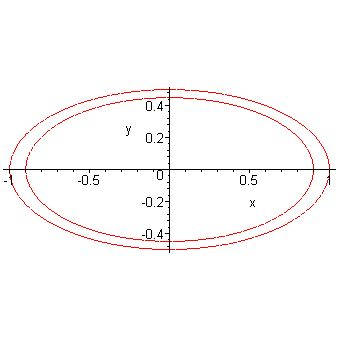


A homoeoid is a thin shell bounded by two similar surfaces with nearly identical shape and orientation. Considering the ellipsoidal shape, we write  

\begin{equation}
\frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} = \beta^2
\end{equation}

a homoeoid will be bound by two surfaces of same semi-axes $a$,$b$ and $c$, but different values of $\beta$. The quantity $\beta$ labels the homoeoid. A spherical shell is a symmetric case of a homoeoid, where $a=b=c$ and $\beta=1$.

#### Volume of homoeoid 

The volume of an ellipsoid of semiaxes $a\beta$, $b\beta$, and $c\beta$, is  

\begin{equation}
V = \frac{4\pi}{3}abc \beta^3 
\end{equation}

considering $a=b$ and $c=a\sqrt{1-e^2}$,

\begin{equation}
V = \frac{4\pi}{3}a^3 \sqrt{1-e^2} \beta^3 
\end{equation}

taking the derivative with respect to $\beta$ we find the volume of an homoeoid

\begin{equation}
dV = 4\pi a^3 \sqrt{1-e^2} \beta^2 d\beta 
\end{equation}

In this thin shell we consider the density constant. That means that a homoeoid has mass $dM$

\begin{equation}
dM = \rho dV = 4\pi \rho(\beta) a^3 \sqrt{1-e^2} \beta^2 d\beta 
\end{equation}

we can switch variable to $m = \beta a $ (not confuse with mass), and thus 

\begin{equation}
dM = \rho dV = 4\pi \rho(m) \sqrt{1-e^2} m^2 dm 
\end{equation}

For a spherical system this reduces to the usual formula $dM = 4\pi \rho(r)  r^2 dr$.


#### Potential of a homoeoid 


##### Elliptic coordinates

Spherically symmetric objects call for spherical coordinates. Elliptic objects call for elliptic coordinates. We will solve the Poisson equation in these coordinates, identifying the $R$ as the long axis and $z$ as the short axis. Polar elliptic coordinates ($u,\nu$) are a orthogonal coordinate system defined such that 

\begin{eqnarray}
R &=& f \ \mathrm{cosh} u  \ \sin \nu\\
z &=& f \  \mathrm{sinh} u  \ \cos \nu\\
\end{eqnarray}


The trigonometric identity 

\begin{equation}
\frac{R^2}{f^2\mathrm{cosh}^2 u} + \frac{z^2}{f^2\mathrm{sinh}^2 u} = \cos^2\nu + \sin^2\nu = 1
\end{equation}


shows that curves of constant $u$ form ellipses - the ellipses are confocal (at $R=f$) but different eccentricities. The hyperbolic trigonometric identity

\begin{equation}
\frac{R^2}{f^2\cos^2\nu} - \frac{z^2}{f^2\sin^2\nu} = \mathrm{cosh}^2 u - \mathrm{sinh}^2 u = 1
\end{equation}

shows that curves of constant $\nu$ form hyperbolae. The figure below shows the coordinate system 

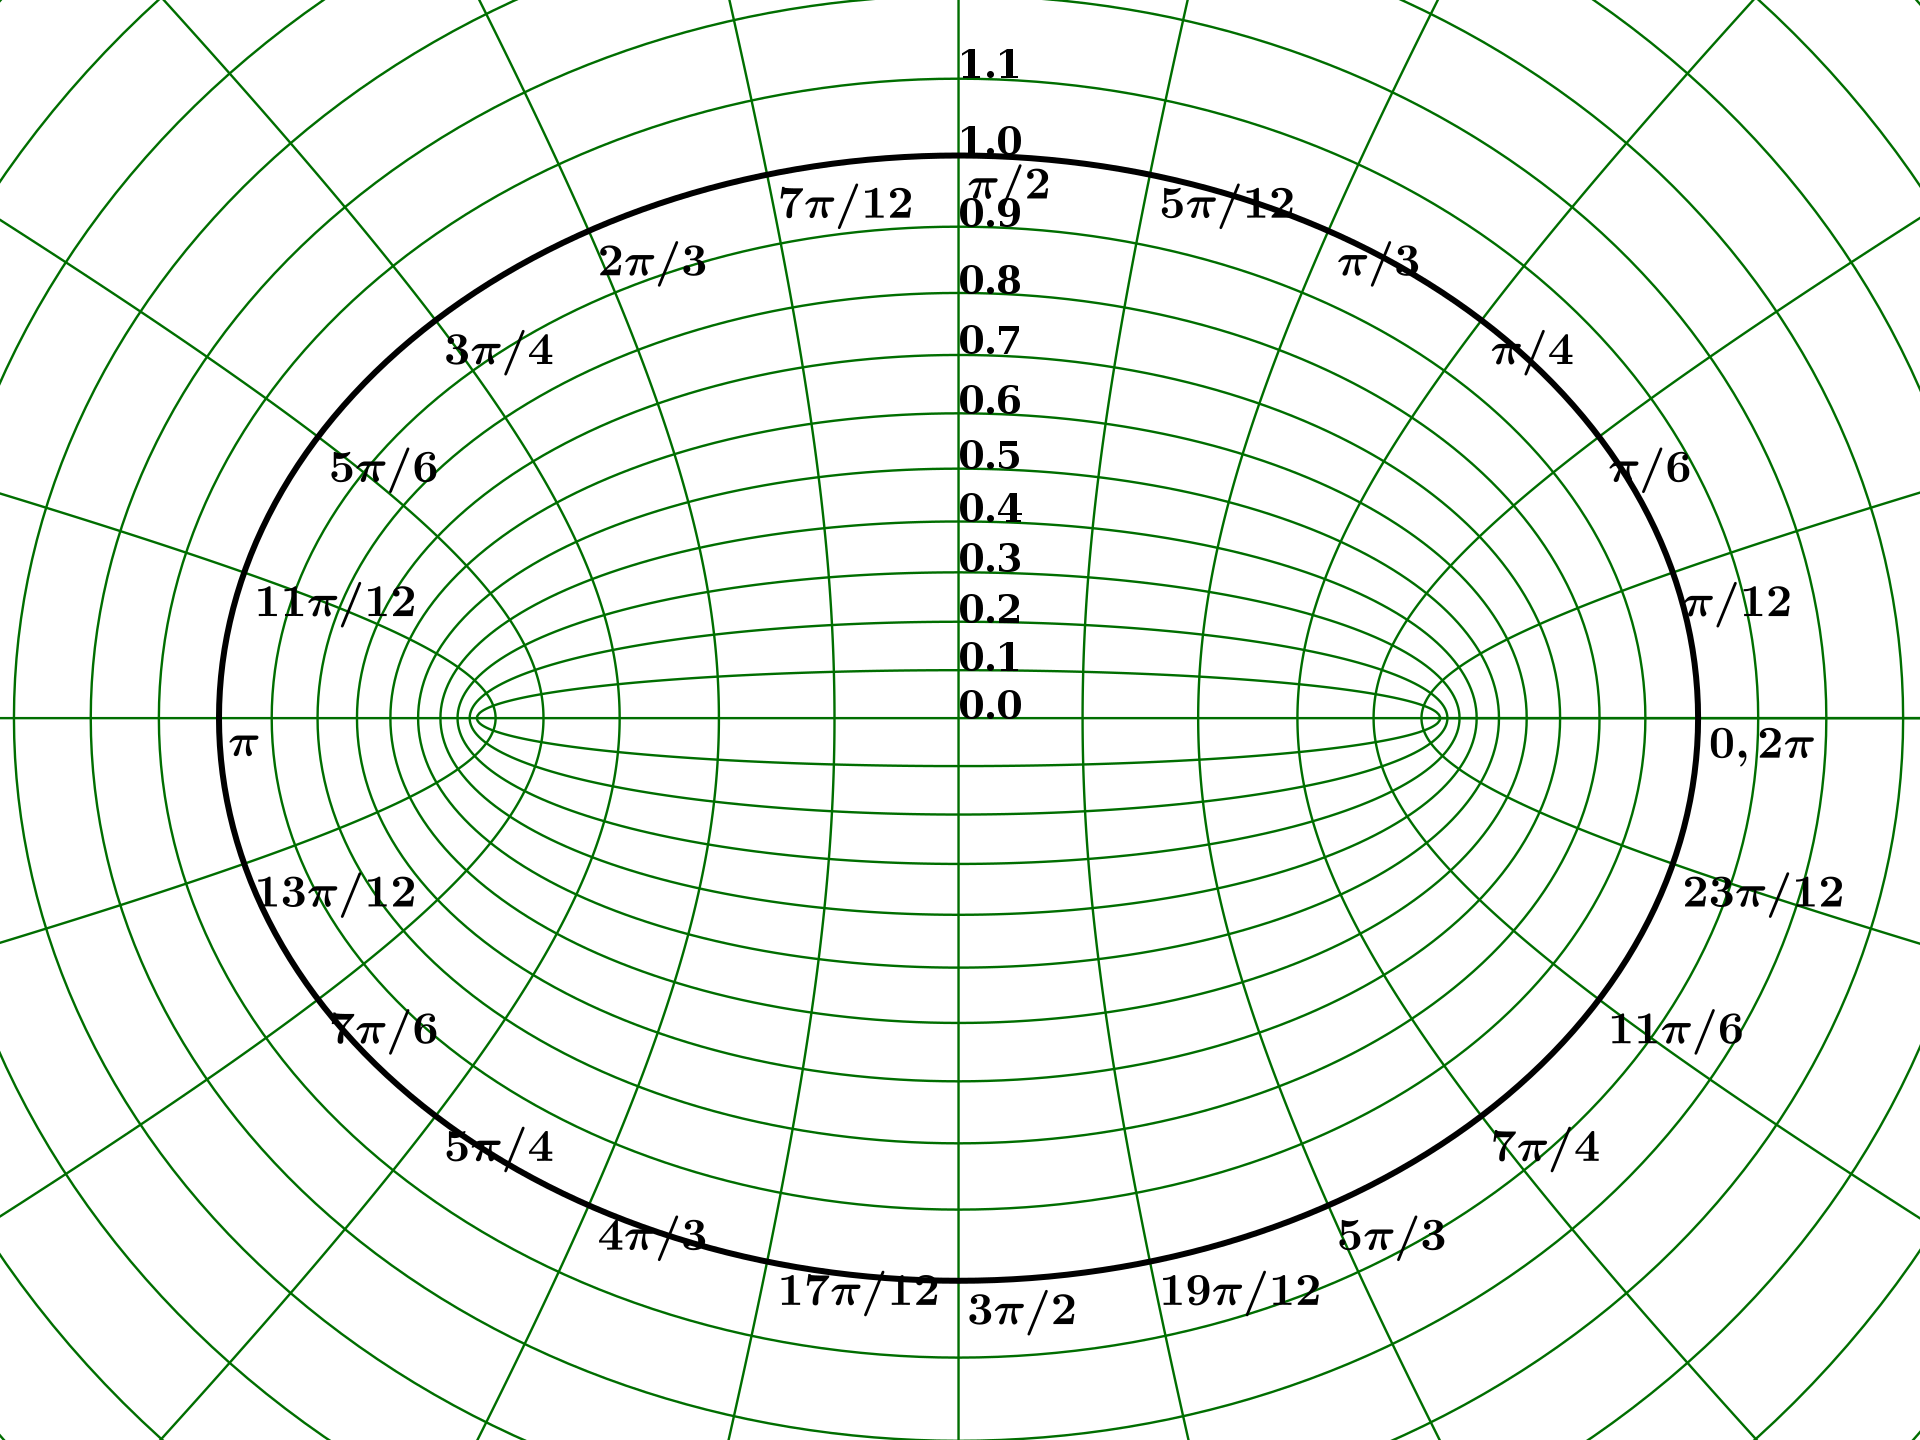


The scale factors of the coordinate system are 


\begin{eqnarray}
h_u = h_v &=& f\sqrt{\mathrm{sinh}^2 \, u + \cos^2\nu}\\
h_\phi &=& f \mathrm{cosh} u\sin\nu
\end{eqnarray}


With the scale factors we can compute the Laplacian 

\begin{equation}
\nabla^2 = \frac{1}{h_1h_2h_3} \left[ \frac{\partial}{\partial u_1} \left(\frac{h_2h_3}{h_1} \frac{\partial}{\partial u_1} \right)+\frac{\partial}{\partial u_2} \left(\frac{h_1h_3}{h_2} \frac{\partial}{\partial u_2} \right)+\frac{\partial}{\partial u_3} \left(\frac{h_1h_2}{h_3} \frac{\partial}{\partial u_3} \right)
\right]
\end{equation}


let's compute it with sympy 




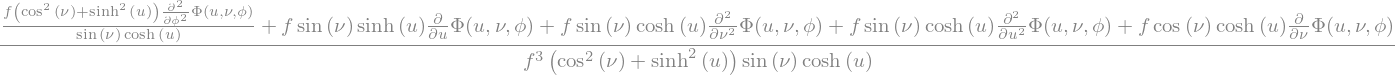

In [13]:

from sympy import diff

f = symbols('f')
u = symbols('u')
nu = symbols('nu')
phi = symbols('phi')
Phi = Function('Phi')(u,nu,phi)

h1 = f * sp.sqrt((sp.sinh(u))**2 + sp.cos(nu)**2)
h2 = h1 
h3 = f * sp.cosh(u)*sp.sin(nu)


du=sp.diff(h2*h3/h1 * sp.diff(Phi,u),u)

dv=sp.diff(h1*h3/h2 * sp.diff(Phi,nu),nu)

dp=sp.diff(h1*h2/h3 * sp.diff(Phi,phi),phi)


laplacian = 1/(h1*h2*h3) * (du+dv+dp) 

sp.simplify(laplacian)



Well, that looks horrible. Luckily, we are interested in potentials that depend on $u$ only. For potentials of this class, $\nabla^2 \Phi = 0$  reduces to 


\begin{equation}
\frac{d}{du} \left( \mathrm{cosh} u \frac{d\Phi}{du}\right)=0
\end{equation}

The solution is either $\Phi$ constant, or $\Phi^\prime = A\,\mathrm{sech}\,u$, with constant $A$. Integrating, we find the potential 

\begin{equation}
\Phi = -A\sin^{-1}\left(\mathrm{sech}\,u\right) + B 
\end{equation}


This potential should yield the spherical potential if we convert back to polar coordinates at large $R$. For large $u$, the eccentricity of the confocal ellipse approaches zero. Ignoring the $\sin\nu$,  we have that $\mathrm{sech}\,u = f/R$. So, the potential scales like  


\begin{equation}
\Phi = -A\sin^{-1}\left(\frac{f}{R}\right) + B 
\end{equation}

at large R, the arcsin is the function, so  

\begin{equation}
\mathrm{lim}_{R \gg f }\ \Phi = -A\left(\frac{f}{R}\right) + B 
\end{equation}

If $B =0$ and $A = G\delta M/f$ with $\delta M$ the mass of the homoeoid, then indeed the potential is equal to that of a shell of mass $\delta M$, tending to zero at infinity. We thus conclude that the integration constants are indeed 

\begin{eqnarray}
A&=&\frac{G\delta M}{f}\\
B&=&0
\end{eqnarray}

We take these values of $A$ and $B$ for the general potential, also setting it constant inside the shell. 

\begin{equation}
\delta\Phi = -\frac{G\delta M}{f} \times \left\{ \begin{array}{cc} 
\sin^{-1}(\mathrm{sech}\,u_0) & \mathrm{if} \ u < u_0 \\
\sin^{-1}(\mathrm{sech}\,u) & \mathrm{if} \ u \geq u_0
\end{array} \right.
\end{equation}

This is the potential of a shell at $u=u_0$. We can write this potential in terms of the eccentricity, noticing that $f$ is the focal length, so $f=ae$. Also, $u_0$ is related to the eccentricity of the shell. The semiaxes have length $a = f \mathrm{cosh} u_0$, and $c=f\mathrm{sinh} u_0$. Hence, the hyperbolic tangent of $u_0$ is $c/a$. Thus, we have the hyperbolic trigonometic identity  

\begin{equation}
 \mathrm{sech} \ u_0 = \sqrt{1-\frac{c^2}{a^2}}  \equiv e 
\end{equation}


Thus, the homoeoid potential is 

\begin{equation}
\boxed{
\delta\Phi = -\frac{G\delta M}{ae} \times \left\{ \begin{array}{ll} 
\sin^{-1}(e) & \mathrm{if} \ u < u_0 \\
\sin^{-1}(\mathrm{sech}\,u) & \mathrm{if} \ u \geq u_0
\end{array} \right.}
\end{equation}


Substituting what we found for the mass of the homoeoid, $\delta M = 4\pi \rho(m) \sqrt{1-e^2} m^2 \delta m$

The potential inside the homoeoid is  


\begin{equation}
\boxed{
\delta \Phi_{\rm int} = -4\pi G \rho(m) \ m \ \delta m \frac{\sqrt{1-e^2}}{e}\sin^{-1}(e)
}
\end{equation}

and the potential outside the homoeoid is 


\begin{equation}
\boxed{
\delta \Phi_{\rm ext} = -4\pi G \rho(m) \ m \ \delta m \frac{\sqrt{1-e^2}}{e}\sin^{-1} \mathrm{sech}\left(u\right)
}
\end{equation}


With these equations, the potential of any axisymmetric ellipsoid can be found. The idea is simply to integrate over all shells, the same procedure we did for the sphericall symmetric case, but instead of integrating over spherical shells, we integrate over oblate shells (homoeoids). 

Two theorems are true for homoeoid mass shells: 

1. The exterior isopotential surfaces of a homoeoid are spheroids that are confocal with the shell. 
2. Inside the homoeoid the potential is constant (Newton's third theorem).



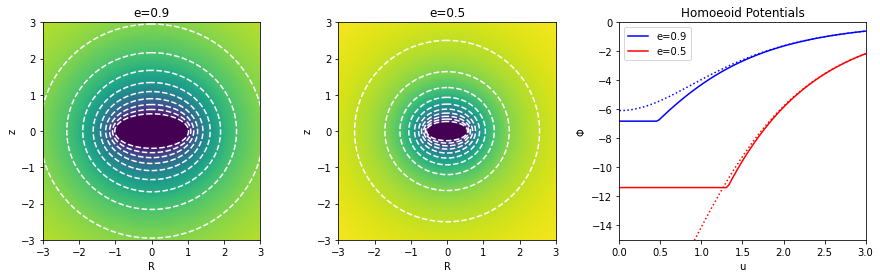

In [14]:
import numpy as np 
import pylab as plt
import mpmath as mp
import matplotlib 
%matplotlib inline  


n_u=100
n_nu=99

u = np.linspace(0,3,n_u)
nu = np.linspace(0,2*np.pi,n_nu)

e=np.array([0.9,0.5])

a=1
rho=1
m=1
G=1
dm=1

f = a*e

u00 = mp.asech(e[0])
u01 = mp.asech(e[1])

u0 = np.array([u00,u01])

uu,nn = np.meshgrid(u,nu)

R=np.zeros([n_nu,n_u,2])
z=np.zeros([n_nu,n_u,2])
for i in range(2):
    R[:,:,i] = f[i]*np.cosh(uu)*np.sin(nn)
    z[:,:,i] = f[i]*np.sinh(uu)*np.cos(nn)

dM = 4*np.pi*rho*np.sqrt(1-e**2)*m**2 * dm 

const = -G*dM/(a*e)

phi=np.zeros([n_nu,n_u,2])

phi_int  = const*np.arcsin(e)

for ie in range(2):
    for iu in range(n_u):
        #phi_ext  = const*np.arcsin(np.sech(uu))
        if (u[iu] < u0[ie]):
            phi[:,iu,ie] = phi_int[ie]
        else:
            phi[:,iu,ie] = const[ie]*np.arcsin(1/np.cosh(u[iu]))
    
    
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,4))

colors=['blue','red']

for i, ax in enumerate(fig.axes):
    if (i != 2):
        ax.contourf(R[:,:,i],z[:,:,i],phi[:,:,0],256)
        ax.contour(R[:,:,i],z[:,:,i],phi[:,:,0],levels=10,colors='white')
        ax.set_aspect("equal")
        ax.set_xlabel("R")
        ax.set_ylabel("z")
        ax.set_title("e="+str(e[i]))
        ax.set_xlim([-3,3])
        ax.set_ylim([-3,3])
    else:
        for j in range(2):
            ax.plot(u,phi[0,:,j],label="e="+str(e[j]),color=colors[j])
            RR=f[j]*np.cosh(u)
            ax.plot(u,-G*dM[j]/RR,linestyle=':',color=colors[j])
        ax.legend()    
        ax.set_xlim([0,3])
        ax.set_xlabel("u")
        ax.set_ylabel(r'$\Phi$')
        ax.set_ylim([-15,0])
        ax.set_title("Homoeoid Potentials")

plt.show()

### Homogeneous ellipsoid


Even after finding the potential of a single homoeoid, the integration of all shells to describe a physical system still results in cumbersome integrals. The potential for a homogeneous ellipsoid is given by

\begin{equation}
\Phi = \pi G \rho_0 \left(A_1 R^2 + A_3 z^2 - Ia^2 \right) 
\end{equation}

where $I$, $A_1$, and $A_3$ are dimensionless coefficients. The table below (from Binney & Tremaine's "Galactic Dynamics") lists the coefficients for oblate, prolate, and triaxial cases. 

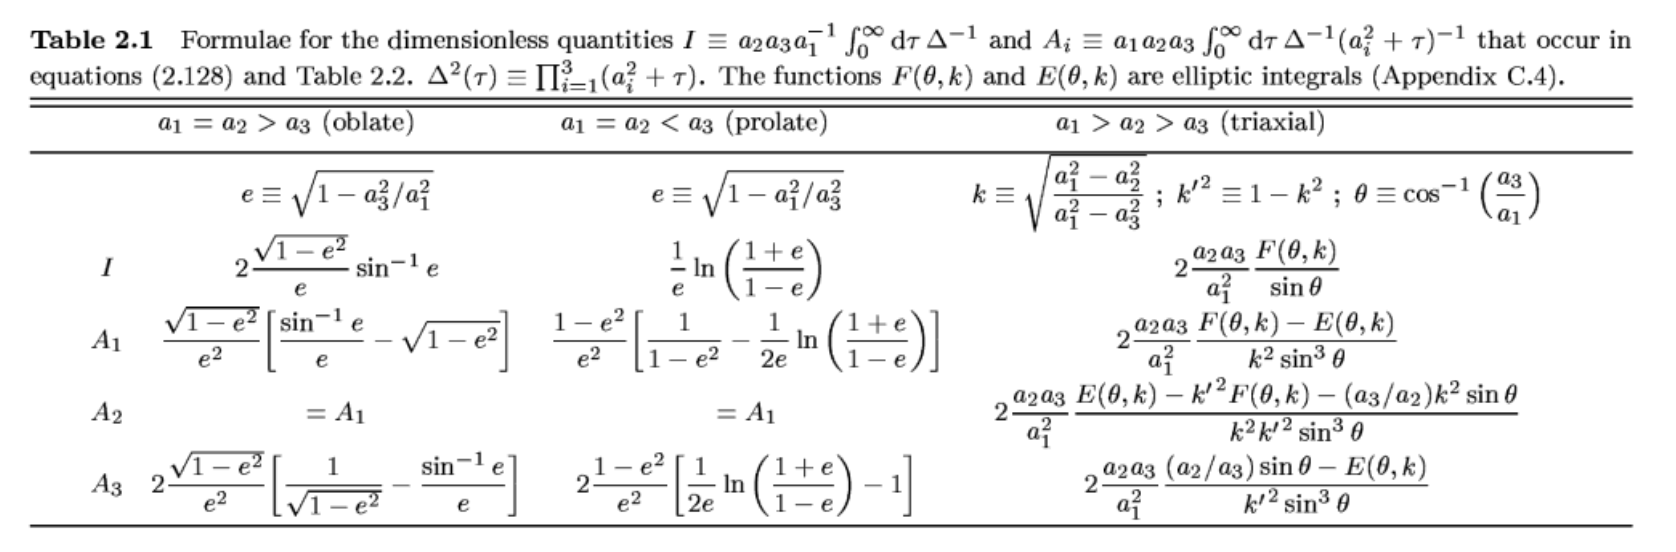


Our case of interest is oblate.

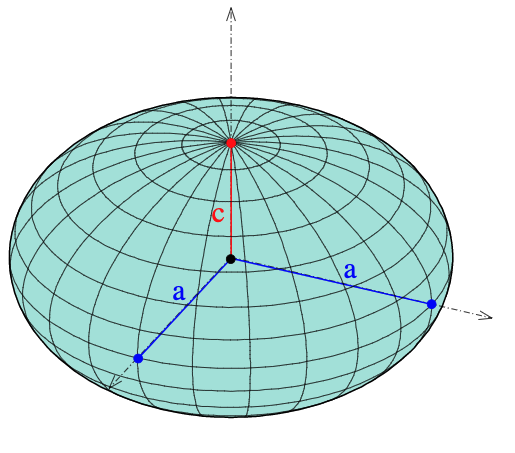


If $a=b > c$, the coefficients are 

\begin{eqnarray}
A_1 = A_2 &=& \frac{(1-e^2)^{1/2}}{e^2}\left[\frac{\sin^{-1} e}{e} -(1-e^2)^{1/2}\right]\\
A_3&=&\frac{2(1-e^2)^{1/2}}{e^2}\left[\frac{1}{(1-e^2)^{1/2}} - \frac{\sin^{-1} e}{e}\right]\\
I &=& \frac{2(1-e^2)^{1/2}}{e}\sin^{-1} e
\end{eqnarray}

where $e$ is the eccentricity

\begin{equation}
e^2\equiv 1-\frac{c^2}{a^2} 
\end{equation}


These expression give the potential of a spheroid of any $0\leq e \leq 1$ eccentricity.


##### Small eccentricity - spherical limit 

At small eccentricity $e \ll 1$, the arcsin is $\sin^{-1} e \approx e + e^3/6$, so 

\begin{eqnarray}
A_1=A_2=A_3 &=& \frac{2}{3}\\
I &=& 2
\end{eqnarray}

The potential of the small eccentricity oblate spheroid is thus 

\begin{equation}
\Phi(\mathbf{x}) = \pi G \rho_0 \left(\frac{2}{3} R^2 + \frac{2}{3} z^2 - 2a^2 \right) 
\end{equation}

We should recover the spherical potential $\Phi=-GM/r$ in this case. Indeed, substituting $R^2+z^2=a^2=r^2$, 


\begin{equation}
\Phi(r) = -\frac{4\pi}{3} G \rho_0 r^2  
\end{equation}

and replacing $M = 4\pi/3 \  r^3\rho_0 $, we indeed find $\Phi=-GM/r$ as expected. 

##### Unity eccentricity -- disk limit 

At $e=1$, the arcsin is $\sin^{-1} 1 = \pi/2$. The second term in parentheses in $A_3$ is finite whereas the first is infinity. Dropping it, the numerator and denominator $1-e^2$, and 

\begin{eqnarray}
A_1=A_2 = I &=& 0 \\
A_3&=&2
\end{eqnarray}

So in this limit ($e\approx 1$, $a\gg c$) 

\begin{equation}
\Phi \approx 2\pi G \rho_0 z^2 
\end{equation}

This is the same potential we found for the thick disk, inside the disk. 

<ipython-input-15-064cb8080a48>:10: RuntimeWarning: divide by zero encountered in true_divide
  A3=2*np.sqrt(1-e**2)/e**2 * (1/np.sqrt(1-e**2) - np.arcsin(e)/e)
<ipython-input-15-064cb8080a48>:10: RuntimeWarning: invalid value encountered in multiply
  A3=2*np.sqrt(1-e**2)/e**2 * (1/np.sqrt(1-e**2) - np.arcsin(e)/e)


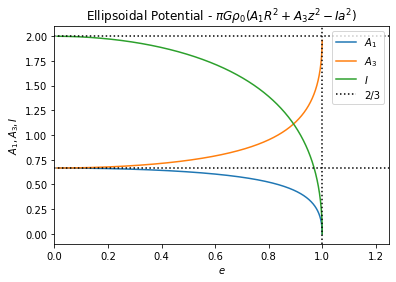

In [15]:
import numpy as np 
import pylab as plt
import matplotlib 
%matplotlib inline  


e=np.linspace(1e-2,1,10000)

A1 = np.sqrt(1-e**2)/e**2 * (np.arcsin(e)/e - np.sqrt(1-e**2))
A3=2*np.sqrt(1-e**2)/e**2 * (1/np.sqrt(1-e**2) - np.arcsin(e)/e)

I =2*np.sqrt(1-e**2)      * np.arcsin(e)/e

plt.plot(e,A1,label='$A_1$')
plt.plot(e,A3,label='$A_3$')
plt.plot(e,I,label='$I$')

plt.axhline(2/3,linestyle=":",color='black',label='2/3')
plt.axhline(2,linestyle=":",color='black')
plt.axvline(1,linestyle=":",color='black')

plt.xlabel(r'$e$')
plt.ylabel(r'$A_1,A_3,I$')

plt.title(r'Ellipsoidal Potential - $\pi G \rho_0 (A_1R^2 + A_3 z^2 - Ia^2)$')

plt.xlim([0,1.25])

legend(loc='best')


plt.show()

### Spheroids with inhomogeneous density distribution


An application of astrophysical interest is 

\begin{equation}
\rho(m) = \rho_0 \left[ 1 + \left(\frac{m}{a_0}\right)^2\right]^{-3/2}  
\end{equation}

which can approximate the bulge density. Here $a_0$ is the core radius, and $e$ the eccentricity. The circular velocity is 

\begin{equation}
v^2_c (R)  = R\frac{\partial\Phi}{\partial R} 
\end{equation}

yielding

\begin{equation}
v^2_c (R)  = 4\pi G\rho_0 a^3 \frac{\sqrt{1-e^2}}{R} k \left[F(\theta_a,k) - E(\theta_a,k) \right]
\end{equation}

Where $F$ and $E$ are incomplete elliptical integrals and 

\begin{equation}
k = \left[\left(\frac{a_0e}{R}\right)^2+1\right]^{-1/2} 
\end{equation}



### Spherical bulge -- Hernquist model 

Returning to the general spherical density 

\begin{equation}
\rho(r) = \frac{\rho_0}{(r/a)^\alpha (1+r/a)^{\beta-\alpha}}
\end{equation}


The model with $\alpha = 1$ and $\beta=4$ is called the ${\bf Hernquist \ model}$ (after Hernquist 1990)

\begin{equation}
\rho(r) = \frac{\rho_0}{(r/a) (1+r/a)^3}
\end{equation}

as it turns out, this is a good approximation for moderately spherical bulges. The mass of this model is 

\begin{equation}
M(r) =  4\pi \int_0^{r} \rho(r^\prime) \ r^{\prime 2} \ dr^\prime 
\end{equation}





### Poisson equation in very flattened systems

For an axisymmetric system, with density $\rho(R,z)$, Poisson's equation is

\begin{equation}
\frac{1}{R}\frac{\partial}{\partial R} \left(R \frac{\partial\Phi}{\partial R}\right) + \frac{\partial^2\Phi}{\partial^2 z} = 4\pi G \rho
\end{equation}

Since the material is very flattened, $\partial_z$ is much smaller than $\partial_R$, and the z-term dominates. We can approximate


\begin{equation}
\frac{\partial^2\Phi (R,z)}{\partial^2 z} \approx 4\pi G \rho(R,z)
\end{equation}

This implies that the vertical variation of the potential at a given radius depends only on the density distribution at that radius. That means that the solution of Poisson's equation in a thin disk can be decomposed in two steps: 

1. Approximate the thin disk by a Dirac delta and determine the potential in the plane of the disk $\Phi(R,0)$
2. At each radius, solve this equation above to find the vertical variation of the potential $\Phi(R,z)$ 

Thus, we have 

\begin{equation}
\Phi(R,z) = \Phi(R,0) + \Phi_z(R,z)
\end{equation}

#### Exponential disk

For a thin disk with radial exponential profile, $\Sigma = \Sigma_0 e^{-R/R_d}$, the potential in the midplane is 

\begin{equation}
\Phi(R,0) = -\pi G\Sigma_0 R \left[ I_0(y) K_1(y) - I_1(y) K_0(y) \right]
\end{equation}

where 

\begin{equation}
y \equiv \frac{R}{2R_D} 
\end{equation}

and $I$ and $K$ are the modified Bessel functions. The corresponding circular velocity is 

\begin{equation}
v^2_c(R) = R\frac{\partial\Phi}{\partial R}  = 4\pi G\Sigma_0 R_d y^2 \left[ I_0(y) K_0(y) - I_1(y) K_1(y) \right]
\end{equation}


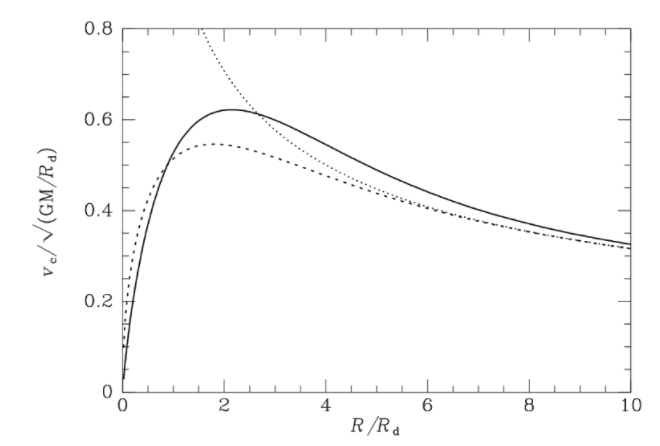



The mass M(r) enclosed by a sphere of radius r is M(r)= 


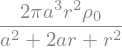

In [16]:
import sympy as sp 
from sympy import integrate

rho0 = sp.Symbol('rho0')
rp = sp.Symbol('rp')
r = sp.Symbol('r')
a = sp.Symbol('a')

rho = rho0/((rp/a)*(1+rp/a)**3)

#rho

print("The mass M(r) enclosed by a sphere of radius r is M(r)= ")
mass=4*sp.pi*integrate(rho*rp**2,(rp,0,r))

sp.simplify(mass)



The mass $M(r)$ enclosed by a sphere of radius $r$ is

\begin{equation}
\boxed{
M(r) = 2\pi \rho_0 a^3  \frac{(r/a)^2}{(1+r/a)^2}
}
\end{equation}


The gravitational potential is given by 

\begin{equation}
\Phi = -G\int_r^{\infty} \frac{M(r)}{r^2} dr
\end{equation}

The potential Phi(r) of a Hernquist sphere is:


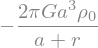

In [17]:
import sympy as sp 
from sympy import integrate

rho0 = sp.Symbol('rho0')
rp = sp.Symbol('rp')
r = sp.Symbol('r')
a = sp.Symbol('a')
G= sp.Symbol('G')

mass = 2*sp.pi*a**3*rho0* ((rp/a)**2/(1+rp/a)**2)

print("The potential Phi(r) of a Hernquist sphere is:")

Phi = integrate(-G*mass/rp**2,(rp,r,infty))

Phi


The potential $\Phi(r)$ of a Hernquist sphere is

\begin{equation}
\boxed{
\Phi = -2\pi G \rho_0 \frac{a^2}{(1+r/a)}
}
\end{equation}

#### Putting it all together

A NWF dark halo, a Hernquist bulge, and an exponential disk give a reasonably accurate galaxy potential. 


\begin{equation}
\Phi = \Phi_{\rm NWF} + \Phi_{\rm Hernquist} + \Phi_{\rm disk}
\end{equation}


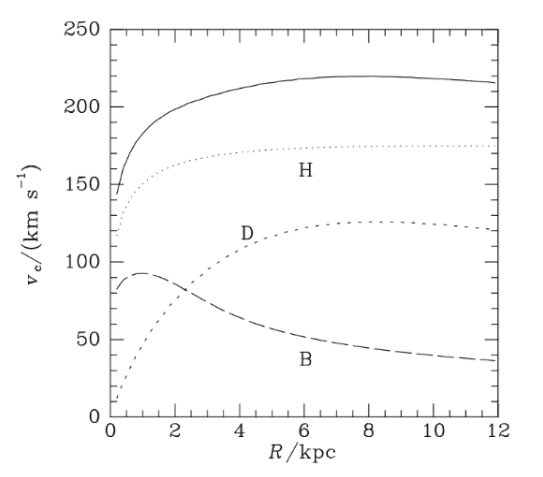


## Stellar orbits

One of the main differences between stellar orbits and planetary orbits is that planets orbit in a Keplerian potential, where orbits do not precess. The argument of pericenter is constant, because the Hamiltonian does not depend on the angular momentum. The same is not true for the NFW dark matter halo potential, so the orbits precess. Here are examples of orbits for equal energy but different angular momentum. The motion is bound between constant apocenter and pericenter, but the orbits are space-filling. Any location between pericenter and apocenter will be visited by the star.    

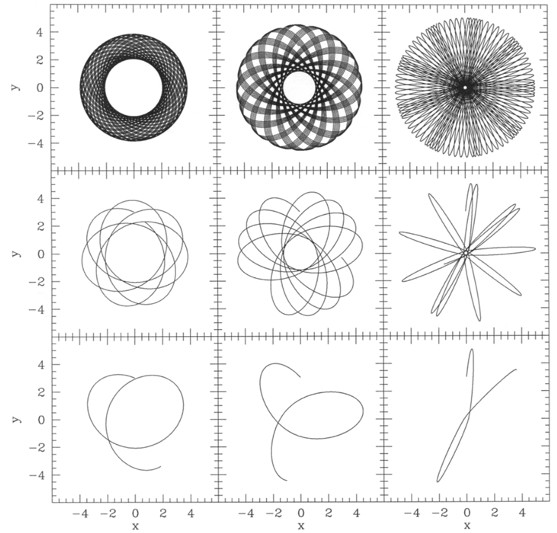

Let us understand this behavior. Considering the Hamiltonian

\begin{equation}
H = \frac{1}{2}\left(\dot{r}^2 + r^2\dot\phi^2\right) + \Phi(r) 
\end{equation}

and since this does not depend explicitly on time, this is constant and equal to the energy. We isolate $\dot{r}$  

\begin{equation}
\dot{r}^2 = 2(E-\Phi) - r^2\dot\phi^2
\end{equation}


use $\dot\phi = L/r^2$ and take the square root 

\begin{equation}
\dot{r} = \sqrt{2(E-\Phi) - \frac{L^2}{r^2}}
\end{equation}

If we now isolate $dr$ and $dt$ 

\begin{equation}
dt = \frac{dr}{\sqrt{2(E-\Phi) - \frac{L^2}{r^2}}}
\end{equation}

We integrate this equation to find the $\mathbf{radial \ period}$, the time that an orbiter takes to go back to the same radial position. This will be equal to twice the period to go from pericenter $r_{\rm min}$ to apocenter $r_{\rm max}$.

\begin{equation}
\boxed{T_r =  2 \int_{r_{min}}^{r_{max}} \frac{dr}{\sqrt{2(E-\Phi) - \frac{L^2}{r^2}}}}
\end{equation}

We can find the infinitesimal azimuthal angle that is swept during an infinitesimal change in radius 

\begin{eqnarray}
d\phi &=& \frac{L}{r^2} dt\\
&=& \frac{L}{r^2} \frac{dt}{dr} dr \\
&=& L \ \frac{dr}{r^2\sqrt{2(E-\Phi) - \frac{L^2}{r^2}}} \\
\end{eqnarray}

Integrating it again from pericenter to apocenter (and multiplying by 2), we find the angle swept during a radial period

\begin{equation}
\boxed{\Delta \phi  = 2L \int_{r_{min}}^{r_{max}}  \frac{dr}{r^2\sqrt{2(E-\Phi) - \frac{L^2}{r^2}}}}
\end{equation}

This is the angle between two pericenter passages. If this is not a multiple of 2$\pi$, precession happens: the angle between two pericenter passages $\mathbf{drifts}$. 


The trajectory is only closed if 

\begin{equation}
\Delta \phi = 2\pi\frac{m}{n}
\end{equation}

where $m$ and $n$ are integer numbers. In general, $\Delta \phi/2\pi$ is not rational though, and a typical orbit resembles a rosette. 

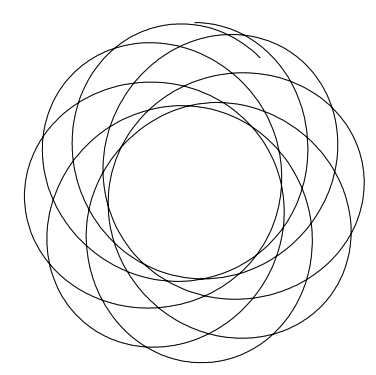



The only two potentials that lead to closed orbits are the Keplerian potential $\Phi=A/r$, and the harmonic oscillator potential $\Phi=Ar^2$. 



### Epicycle approximation

Consider the motion in the effective potential


\begin{eqnarray}
\ddot{R} &=& -\frac{\partial \Phi_\mathrm{eff}}{\partial R}\\
\ddot{z} &=& -\frac{\partial \Phi_\mathrm{eff}}{\partial z}
\end{eqnarray}

where the effective potential is given by 

\begin{equation}
\Phi_\mathrm{eff} = \Phi(R,z) + \frac{L_z^2}{2R^2}
\end{equation}

In the epicycle approximation, we consider orbits which small perturbation to a circular orbit $R_c$. We defined the perturbation position 

\begin{equation}
x = R - Rc
\end{equation}

and expand the effective potential into a Taylor series about $R=R_c$ 


\begin{equation}
\Phi_\mathrm{eff} = \frac{1}{2}\frac{\partial^2 \Phi_\mathrm{eff}}{\partial R^2} x^2 + \frac{1}{2}\frac{\partial^2 \Phi_\mathrm{eff}}{\partial z^2} z^2
\end{equation}


we define 

\begin{eqnarray}
\kappa^2 &=& \frac{\partial^2 \Phi_\mathrm{eff}}{\partial R^2} \\
\nu^2 &=& \frac{\partial^2 \Phi_\mathrm{eff}}{\partial z^2} 
\end{eqnarray}

so that the potential is 

\begin{equation}
\Phi_\mathrm{eff} = \frac{1}{2}\kappa^2 x^2 + \frac{1}{2}\nu^2 z^2
\end{equation}

These are harmonic oscillators. The body executes a small ellipse around ($R_0$,$z_0$) in the circular orbit. This small ellipse is an epicycle. $\kappa$ is called $\mathbf{epicyclic \ frequency}$, and $\nu$ is the $\mathbf{vertical \  frequency}$.

To find the epicyclic frequency, expand the effective potential 

\begin{eqnarray}
\kappa^2 &=& \frac{\partial^2 \Phi_\mathrm{eff}}{\partial R^2}\\
&=& \frac{\partial^2 \Phi}{\partial R^2} + \frac{3L_z^2}{R_c^4}
\end{eqnarray}

and introduce $\Omega(R)$, the angular velocity of the circular orbit. For a circular orbit, we have 


\begin{equation}
\Omega^2 R = \frac{\partial \Phi}{\partial R} = \frac{L_z^2}{R_c^3} 
\end{equation}

taking the derivative 

\begin{equation}
\frac{\partial^2 \Phi}{\partial R^2} = \Omega^2 + R\frac{d\Omega^2}{d R} 
\end{equation}

and $L_z^2/R_c^4 = \Omega^2$. Thus 


\begin{equation}
\kappa^2 = 4\Omega^2 + R\frac{d\Omega^2}{d R} 
\end{equation}

For most astronomically interesting cases 

\begin{equation}
\Omega < \kappa < 2\Omega
\end{equation}

In the Keplerian potential, $\kappa=\Omega$. 



The equations of motion for particles disturbed from circular motion are


\begin{eqnarray}
\ddot{x} &=& -\kappa^2 x \\
\ddot{z} &=& -\nu^2 z \\
\end{eqnarray}


These are harmonic oscillators, with solutions given by

\begin{eqnarray}
x &=& B\cos(\kappa t + C_1) \\
z &=& A\cos(\nu t + C_2) 
\end{eqnarray}


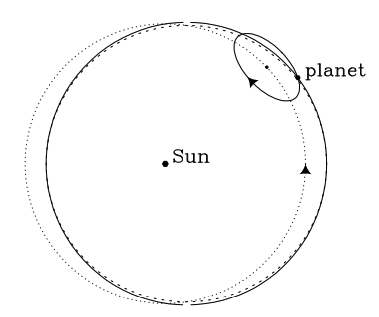



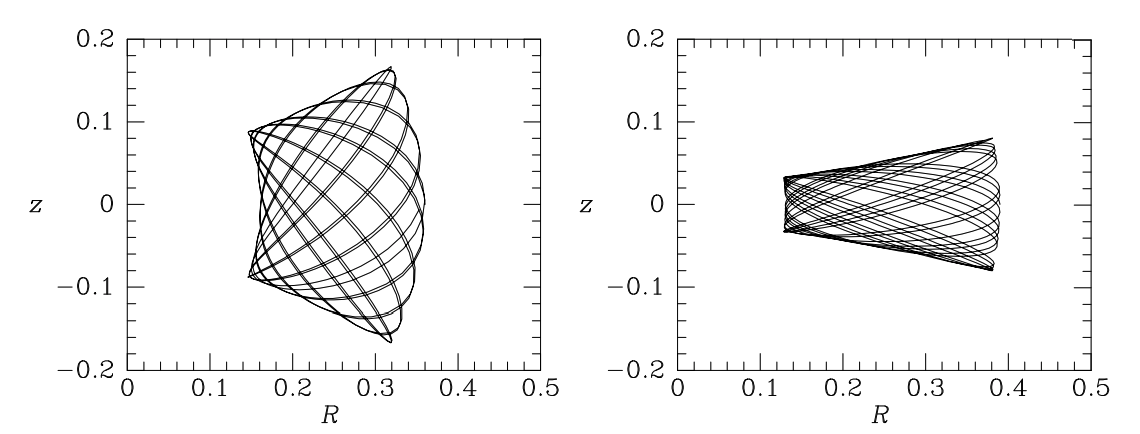


### Dynamical Time

Consider a homogeneous sphere with constant density $\rho$ = const. Take a particle at rest at distance $r$ and drop it. The equation of motion is 

\begin{equation}
\frac{d^2r}{dt^2} = - \frac{GM}{r^2} = - \frac{4\pi}{3}G\rho r
\end{equation}

This is the equation for a harmonic oscillator with frequency $\omega$

\begin{equation}
\omega^2  = \frac{4\pi}{3}G\rho
\end{equation}

The period of oscillation is 

\begin{equation}
T = \frac{2\pi}{\omega}  = \sqrt{\frac{3\pi}{G\rho}}
\end{equation}

The dynamical time (time to reach the center) is a fourth of the period. 


\begin{equation}
T_{\rm dyn}  = \frac{T}{4}  = \sqrt{\frac{3\pi}{16G\rho}}
\end{equation}

### Free-fall time 

The free-fall time is the time for the collapse of the sphere

\begin{equation}
T_{\rm ff}  = \frac{T_{\rm dyn}}{\sqrt{2}} 
\end{equation}

### Crossing time 

If $R$ is a typical size of a system and $v$ a typical velocity, then the crossing time is 

\begin{equation}
t_{\rm cross}  = \frac{R}{v} 
\end{equation}


## Virial Theorem

Consider the scalar $\sum_i p_i r_i$. Derivate it in time so that 

\begin{equation}
\frac{d}{dt} \sum_i p_i r_i = \sum_i \dot{p}_i r_i + p_i \dot{r}_i
\end{equation}

The last term is $\sum_i m_i v^2_i$ , equal to twice the total kinetic
energy of the star, $2K$. Recalling also that $\dot{p}_i = F_i$, the
first term is $\sum_i F_i r_i$, or the work done by the
gravitational force. This is the quantity $W$ derived first. So, 

\begin{equation}
2K + W = \frac{d}{dt}\sum_i p_i r_i 
\end{equation}

We can evaluate the time derivative by noticing this is 

\begin{equation}
\frac{d}{dt}\sum_i m_i \dot{r}_i r_i = \frac{1}{2}\frac{d}{dt}\sum_i
\frac{d}{dt} \left( m_i r_i^2\right) = \frac{1}{2}\frac{d^2 I}{dt^2}
\end{equation}

where $I$ is the inertia moment. If $d^2I/dt^2=0$, 

\begin{equation}
2K + W = 0 
\label{eq:virial}
\end{equation}

The virial theorem. According to the virial theorem, the total energy
is half the gravitational potential energy


\begin{equation}
E = K + W = \frac{W}{2} = -\frac{|W|}{2}
\end{equation}


This is the virial theorem. Typically it is applied with the assumption that the $d^2I/dt^2$ = 0
implying a stationary system.


### Limits of applicability

Two important details: 

(1) we did not do any averaging over time to come to the final expression. As long as the second derivative of the moment of inertia is zero, the virial theorem holds. In this form the virial theorem cannot be used for, say a binary star system on elongated orbit because the moment of inertia changes at each moment of time. 

(2) The kinetic and potential energies are total energies of all particles in the system. If we do not have information about some component of the system (e.g., dark matter) we cannot apply the theorem to estimate the mass of the system. We cannot even get the mass of the visible component because in our derivation we used gravitational accelerations, which depend on all matter, not only on its visible part. There is another complication: the system is supposed to be isolated. If it is not (as often is the case), the theorem cannot be used.

There are other ways to derive the virial theorem, which actually give somewhat different results. One typical situation is a system, which instantaneously not stationary, but when averaged over time gives $\langle d^2I/dt^2\rangle = 0$. In this case the virial theorem reads:

\begin{equation}
2\langle K\rangle + \langle W\rangle = 0
\end{equation}

In other words, averaged over time kinetic and potential energies still obey the virial relation. Note that this is a different statement as compared with the original equation, where the energies are instantaneous quantities. The time-average form of the virial theorem is not very useful in the case of galaxies or even clusters of galaxies because those systems evolve over time quite substantially. So, it is not clear over what period of time the averaging should be done. Nothing to say that observationally, time averaging of individual galaxies is unrealistic: should we wait a billion year to find the time-average of kinetic energy of the Milky Way? The instantaneous form is a bit easier to handle: we need to estimate the rate of change of the moment of inertia.

Virial theorems also are applicable to stars where the kinetic energy is the thermal energy of all gas particles. Quantum systems also obey the virial theorems.


### Mass estimates via the virial theorem

We can use the virial theorem to estimate the mass of a stationary isolated system. We introduce the gravitational radius $r_g$ of a system:

\begin{equation}
W = −\frac{GM^2}{r_g}
\end{equation}

Note that here we do not assume anything about the system. We do not assume that is spherical or its density is smooth; no assumptions. This equation simply states that potential energy scales as $M^2$. Details of the mass distribution are hidden in rg. For a system with equal-mass points we have
 
\begin{equation}
\frac{1}{r_g} = \langle \frac{1}{r_{ij}}\rangle 
\end{equation}


Another example: sphere with homogeneous density distribution $\rho $ = const and radius $R$. In this case $W = −3/5 \ GM^2/R$ and $r_g = 5R/3$. Note that in this case the gravitational radius is larger than the radius of the sphere. The kinetic energy can be parameterized as

\begin{equation}
K = −\frac{M\langle V^2\rangle}{2}
\end{equation}

where $\langle V^2\rangle$ is the velocity dispersion. Again, no assumptions here: this is always valid. Assuming that the line-of-sight velocity dispersion $\langle V^2_{\rm los}\rangle$ is 1/3 of the 3D velocity dispersion, we get the following estimate of the mass:
los

\begin{equation}
M = \frac{3r_g \langle V^2_{\rm los}\rangle }{G}
\end{equation}
 
Here we specifically assumed that the observed rms velocities are equal to the rms velocities of all material in the system, which may not be correct. However, experience with different systems (either analytical models or numerical simulations) shows that this is not a bad approximation. The main problem is to estimate $r_g$. There are a number of problems with the estimate. First, $r_g$ typically is a radius, which is dominated by large-distance pairs. Each pair has a relatively small contribution, but there are many of them and they dominate the final result. Because observationally it is more difficult to measure objects in outer radii of a system, we are susceptible to numerous observational complications (e.g, projection or non-equilibrium effects). Second, spatial distribution of observed objects may be very different as compared with, say dark matter.

It is remarkable that the virial theorem still gives sensible estimates of masses. It is generally believed that it gives estimates within a factor of 2-3 of the real values. However, it is difficult to make those estimates more accurate.

## Dynamical Friction

Consider $N$ point masses, of mass $m_i$ moving with velocities $v_i$. The objects are moving in a system ("galaxy") of radius $R$ and mass $M$. 

The potential that a particle sees as it moves through the system has two components: 

- A smooth potential due to the mass of all objects. This potential is a cummulative effect of masses in the system. 
- Short and strong fluctuations due to the discrete objects. These fluctuations are produced by encounters with individual objects ("collisions").  


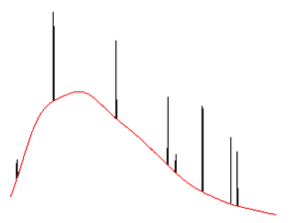


There are a number of effects related and produced by the encounters. 

### Two-Body Relaxation / Scattering

Gradual accumulation of deviations of trajectories of particles. 


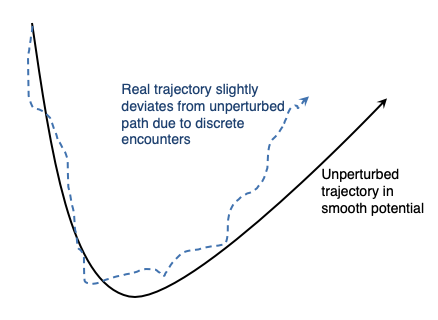


The timescale of this accumulation is called two-body relaxation time. 

There are different ways to characterize the deviations. All of them treat the deviations in a statistical way. For example, we can define the relaxation time as the time when the <i>average</i> deviation of the velocity is equal to the velocity of the unperturbed motion. Here, <i>average</i> implies averaging over different trajectories. 

Another measure of deviations is the deviation of the energy of the particles. 

In order to find the timescale for the effect, we estimate the local rate of the change of the measure of the deviations. For example, if we use velocities, then the time of the two-body relaxation is defined 
as 

\begin{equation}
\frac{\Delta v}{v} = \frac{\Delta t}{t_{\rm relax}}
\end{equation}

where $\Delta v$ is the change in $v$ in the $\Delta t$ interval. 

### Drag

Objects that are more massive experience a drag - their motion is slowed down. This effect is called <b>dynamical friction</b>. 

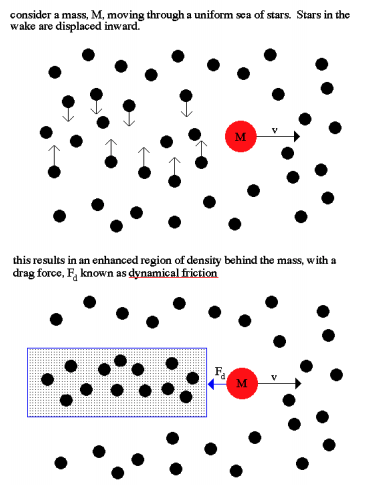


A massive object loses energy and angular momentum. It gradually sinks to the center of the system. 

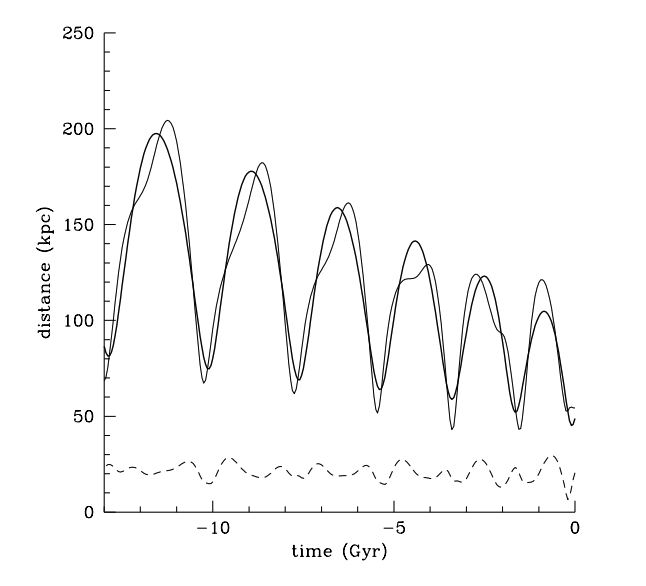


### Heating 

If some objects slow down their motion, some will accelerate ("heating"). In extreme cases, that leads to "evaporation". Some objects escape from the system and become unbound. 

The process of slowing down of massive objects and accelerating of lighter objects leads to 

- tendency of equipartition of energy 

\begin{equation}
\langle \frac{m_1v_1^2}{2} \rangle =\langle \frac{m_2v_2^2}{2} \rangle 
\end{equation}

- mass segregation

\begin{equation}
\langle r(m_2) \rangle < \langle r(m_1) \rangle 
\end{equation}

for $m_2 < m_1$. 


### Two-body relaxation time 

The basic idea behind dynamical friction is that a moving mass attracts objects to it, but because of its motion, the objects tend to gather behind the mass, pulling it backwards. 

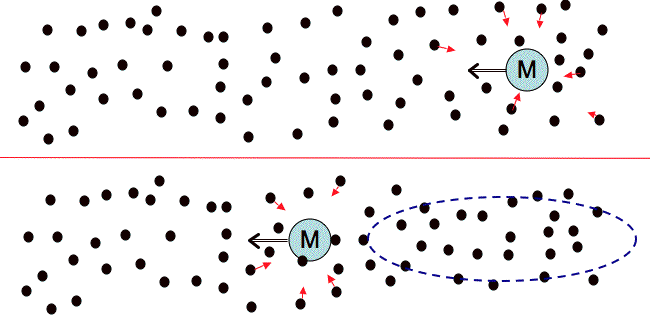

To calculate the drag force, it is best to think of a single object passing the mass on a Keplerian hyperbolic trajectory.

A star of mass $M$ moves with velocity $v_M$ through a swarm of stars. The number density of stars is $n_0$, and their velocity distribution $f(v)$ is Maxwellian. 

Due to gravitational encounters with other stars, the trajectory of a star $M$ will gradually change. We want to estimate the rate of this change. 

- Find results of individual encounters.
- Sum up the results of many encounters.


Let us first treat an encounter of two bodies, of mass $m$ and $M$, approaching with velocities $\mathbf{v}_m$ and $\mathbf{v}_M$, respectively. The equation of motion for the separation is


\begin{equation}
\frac{mM}{m+M} \ddot{\mathbf{r}} = -\frac{GMm}{r^3}\mathbf{r}
\end{equation}


If $\Delta \mathbf{v}_m$ and $\Delta \mathbf{v}_M$ are the changes in the velocities $\mathbf{v}_m$ and $\mathbf{v}_M$ during the encounter, then 

\begin{equation}
\Delta \mathbf{v}_m - \Delta \mathbf{v}_M = \Delta \mathbf{v} 
\end{equation}

where $\mathbf{v} = \dot{\mathbf{r}}$. By conservation of momentum   

\begin{equation}
\Delta \mathbf{v}_M  = - \frac{m}{m+M} \ \Delta \mathbf{v} 
\end{equation}

Thus, we need to find $\Delta\mathbf{v}$ after the collision.  


###### Two-body scattering 

This is a staple celestial mechanics calculation, well-known from planetary dynamics. Consider the two-body encounter to be a hyperbolic orbit 

<div>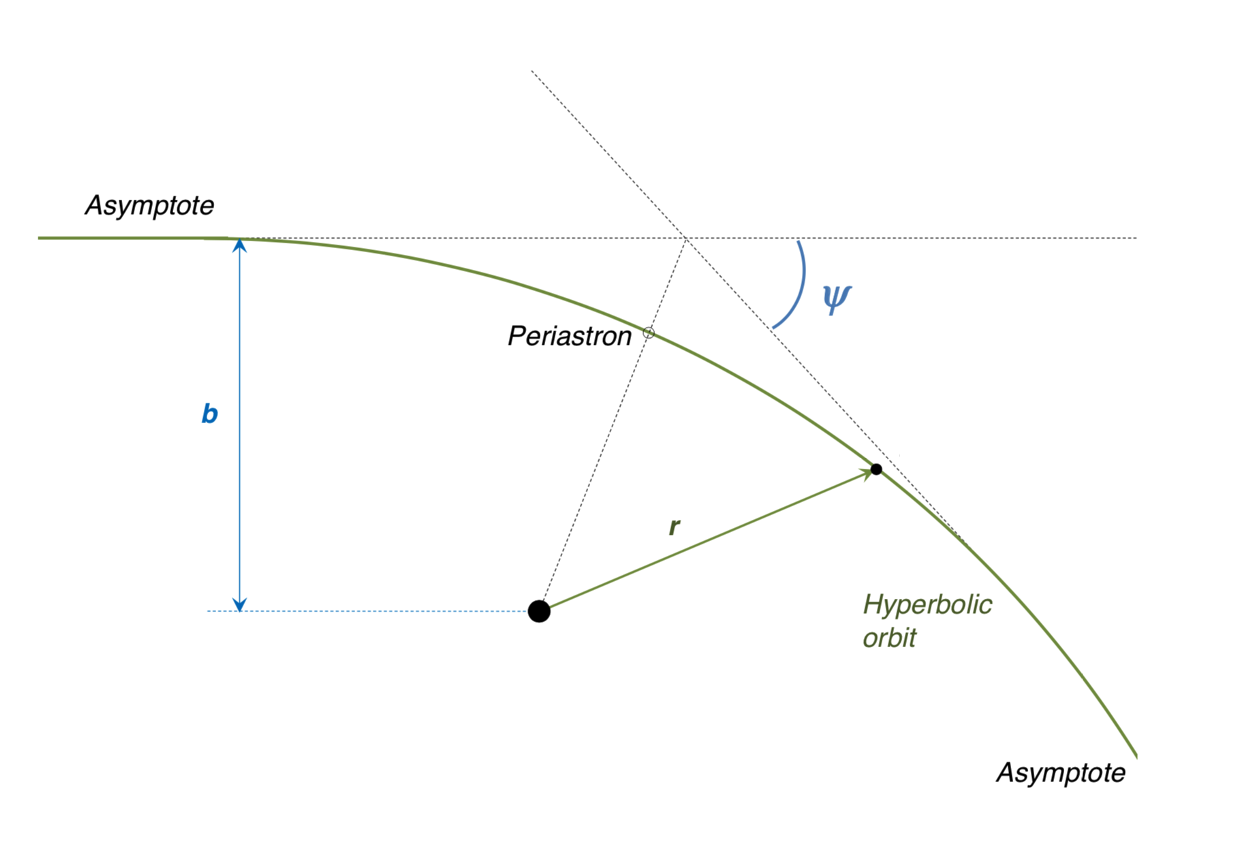</div>

Considering the equation of the orbit in the reduced mass frame


\begin{equation}
\frac{p}{r}  = 1 + e \cos\phi
\end{equation}

where $p$ is the semilatus rectum (do not confuse with momentum). The eccentricity is 

\begin{equation}
e^2 = 1 + \frac{2EL^2}{[G(M+m)]^2} 
\end{equation}

where $E$ is the energy and $L$ the angular momentum, constants. We find them by considering the particle at infinity. 


\begin{eqnarray}
E &=& \frac{v^2}{2}\\
L &=& vb
\end{eqnarray}


<div>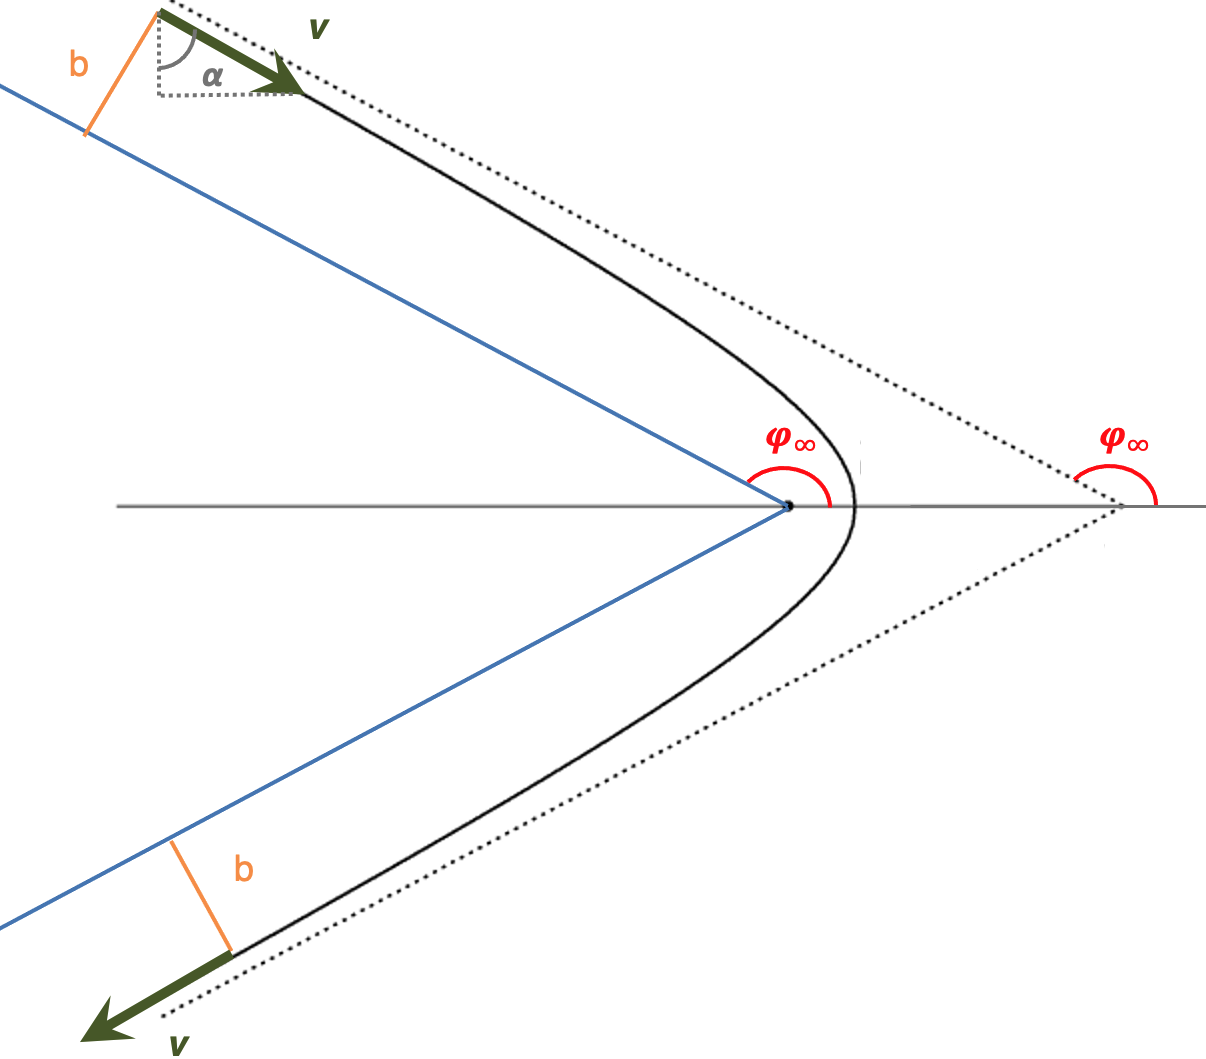</div>


Considering the equation of the orbit, when $\phi$ goes to infinity, then we have $\cos\phi_\infty = -1/e$. The angle $\alpha$ is found by trigonometry, being $\alpha = \phi_\infty - \pi/2$. Consequently  

\begin{eqnarray}
\sin \alpha &=& -\cos\phi_\infty = 1/e\\
\cos \alpha &=& \sqrt{1-\sin^2\alpha} = \frac{\sqrt{e^2-1}}{e}
\end{eqnarray}

Considering now that the orbit is symmetric, so that in magnitude, $v_{\rm before} = v_{\rm after}$. In vector form, though, the direction has changed


\begin{equation}
\mathbf{v}_{\rm after} = \mathbf{v}_{\rm before} + \Delta\mathbf{v}  
\end{equation}

<div>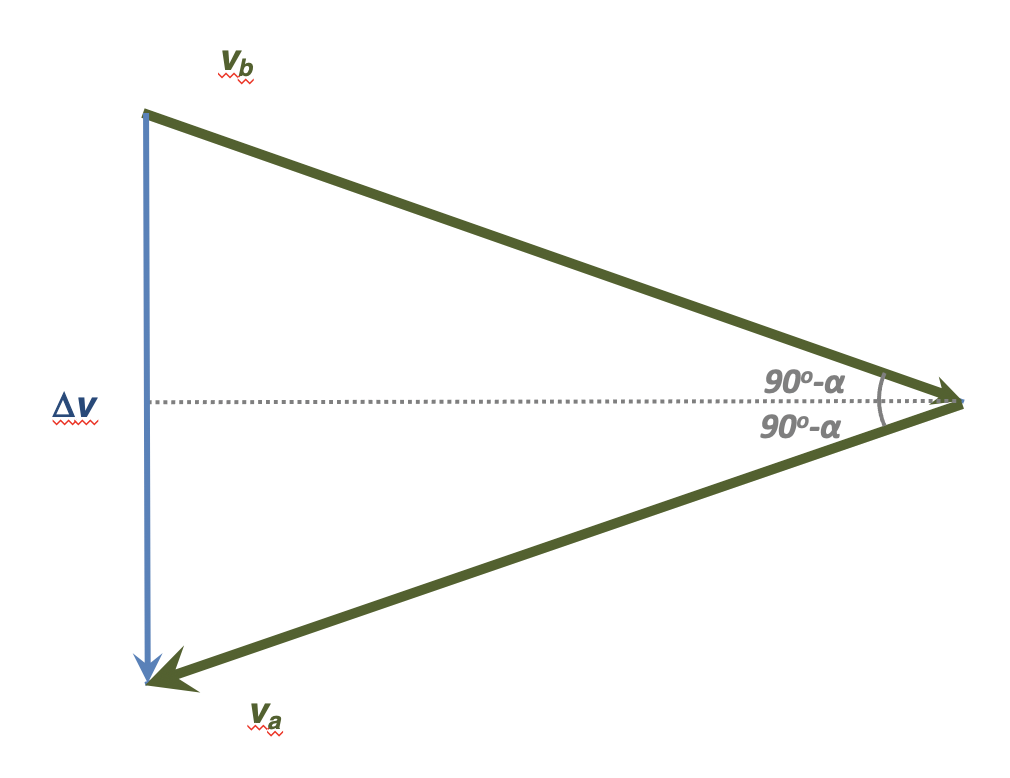</div>


and we can break $\Delta\mathbf{v}$ into two components, one parallel to $\mathbf{v}_{\rm before}$, and another, perpendicular to it. Let us call these $|\Delta \mathbf{v}|_{||}$ and $|\Delta \mathbf{v}|_\perp$


<div>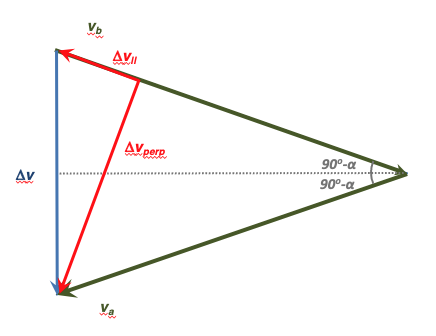</div>


Geometrically, 

\begin{eqnarray}
|\Delta \mathbf{v}|_\perp &=& v \ \sin 2\alpha\\
|\Delta \mathbf{v}|_{||} &=& v \ (1-\cos 2\alpha)
\end{eqnarray}


substituting the expressions we found for $\sin\alpha$ and $\cos\alpha$


\begin{eqnarray}
|\Delta \mathbf{v}|_\perp &=& 2v \ \frac{\sqrt{e^2-1}}{e^2}\\
|\Delta \mathbf{v}|_{||} &=& 2v \ \frac{1}{e^2}
\end{eqnarray}

And substituting the expression for the eccentricity in terms of energy and angular momentum

\begin{eqnarray}
e^2 &=& 1 + \frac{2EL^2}{[G(M+m)]^2} \\
    &=& 1 + \left(\frac{v^2b}{G(M+m)}\right)^2
\end{eqnarray}


we have 

\begin{eqnarray}
|\Delta \mathbf{v}|_\perp &=& \frac{2bv^3}{G(M+m)} \ \frac{1}{1+  \left(\frac{bv^2}{G(M+m)}\right)^2       }\\
|\Delta \mathbf{v}|_{||} &=& 2v \ \frac{1}{ 1+  \left(\frac{bv^2}{G(M+m)}\right)^2   }
\end{eqnarray}

By conservation of momentum, the more massive particle has the same shifts in velocity, scaled by $m/(M+m)$. 


\begin{eqnarray}
|\Delta \mathbf{v}_{M}|_\perp &=& \frac{2mbv^3}{G(M+m)^2} \ \frac{1}{1+  \left[\frac{bv^2}{G(M+m)}\right]^2       }\\
|\Delta \mathbf{v}_{M}|_{||} &=& \frac{2mv}{M+m} \ \frac{1}{ 1+  \left[\frac{bv^2}{G(M+m)}\right]^2   }
\end{eqnarray}

We can simplify this by noticing that $G(M+m)/v^2$ is the semimajor axis of the hyperbola, which, geometrically, is the minimum impact parameter, $b_{\rm min}$. Making this substitution, the change in velocity in the perpendicular and parallel directions are 


\begin{eqnarray}
|\Delta \mathbf{v}_{M}|_\perp &=& 2v \ \frac{m}{(m+M)} \ \frac{b}{b_{\rm min}}\ \frac{1}{[1+(b/b_{\rm min})^2]}\\
|\Delta \mathbf{v}_{M}|_{||} &=& 2v \ \frac{m}{(m+M)} \ \frac{1}{[1+(b/b_{\rm min})^2]}
\end{eqnarray}

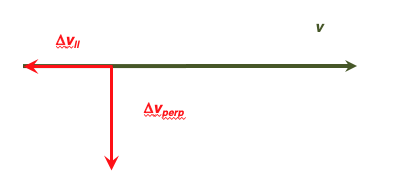

One can see that when integrating over all impact parameters, $|\Delta \mathbf{v}_{M}|_\perp$ will cancel out. No momentum is added in the direction perpendicular to the motion. In the parallel direction, momentum loss accumulates, like a drag force. We will use $|\Delta \mathbf{v}_{M}|_{||}$ to estimate the dynamical friction. The effect on $\Delta \mathbf{v}_{M}|_\perp$ is not negligible, though. A random walk results from all the encounters, adding kinetic energy. The timescale of this injection is the timescale for two-body relaxation, which we will calculate now. 




#### Relaxation timescale

###### Collisions per unit time

Consider the geometry below. An object of mass $M$ traveling with relative velocity $\mathbf{v}$ in a time interval $dt$. The object encounters stars at impact parameter $b$. We want to integrate over all impact parameters.

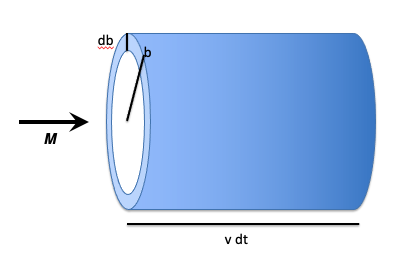


We also need to know the number of stars that are colliding. Considering $f(\mathbf{v}) \ d\mathbf{v}$ to be the number of stars in a unit volume element with velocity between $\mathbf{v}$ and $\mathbf{v}+d\mathbf{v}$, the amount of energy transfered by the stars with impact parameter between $b$ and $b+db$ within a time interval $dt$ is 

\begin{equation}
\sum |\Delta {\mathbf{v}_M}_\perp|^2 = \int f(\mathbf{v}) \  |\Delta \mathbf{v}_{M}|_\perp^2 \ 2\pi b db \ \mathbf{v} dt \ d\mathbf{v}
\end{equation}

Notice that here we integrate $\Delta \mathbf{v}_\perp^2$, not $\Delta \mathbf{v}_\perp$. The integral in with the first power of $\Delta {\mathbf{v}_M}_\perp$ (momentum) is zero. 

Let us take the integral over the impact parameter $b$. 

##### Types of collisions

- Close encounters $b \leq b_{\rm min} \longrightarrow \Delta v_\perp \geq v$

These types of collision happen only very rarely. We can estimate $b_{\rm min}$ for the solar neighborhood


\begin{equation}
b_{\rm min} = \frac{G(M+m)}{v^2} 
\end{equation}

plugging solar values, $m = 1 M_\odot$ and $v = 20 km/s$, results in $b_{\rm min} \approx 10^{-5} \,\mathrm{pc} \approx 1\,\mathrm{AU}$. Collisions that close are rare (none happened for the Sun in the age of the solar system) and can be ignored. 

- Long-distance $b \gt b_{\rm min}$

Each collision has only very small impact, but there are many of them. Integrate from $b_{\rm min}$ to $b_{\rm max}$. Let us break the triple integral, first integrating in $db$, then in $dv$ and finally $dt$. 

\begin{eqnarray}
\sum |\Delta {\mathbf{v}_M}_\perp|^2 &=& \int f(\mathbf{v}) \  |\Delta \mathbf{v}_{M}|_\perp^2 \ 2\pi b db \ \mathbf{v} dt \ d\mathbf{v}\\
&=& 2\pi \int_t \ \left[ \ \int_v f(\mathbf{v}) \  \left(\int_b |\Delta \mathbf{v}_{M}|_\perp^2 \ b db\right) \ \mathbf{v} \ d\mathbf{v}\right] \ dt 
\end{eqnarray}

The integral in $b$ is


\begin{equation}
I \equiv \int_{b_{\rm min}}^{b_{\rm max}} (\Delta \mathbf{v}_{M\perp}^2) b db   
\end{equation}

and susbtituting the value we found for $\Delta \mathbf{v}_{M\perp}$, 

\begin{equation}
I = \left[\frac{2m}{(M+m)} \right]^2  v^2 \int_{b_{\rm min}}^{b_{\rm max}} b \left(\frac{b}{b_{\rm min}}\right)^2  \frac{1}{\left[1+\left(\frac{b}{b_{\rm min}}\right)^2\right]^2}db   
\end{equation}

which yields

\begin{equation}
I = 4 \left[\frac{m}{(M+m)}\right]^2 v^2 b_{\rm min}^2 \ln \left(1+\frac{b_{\rm max}}{b_{\rm min}}\right).
\end{equation}

Using $b_{\min} = G(M+m)/v^2$


\begin{equation}
I = \frac{4G^2 m^2}{v^2} \ln \left(1+ \frac{b_{\rm max}}{b_{\rm min}}\right).
\end{equation}

and definining

\begin{equation}
\Lambda \equiv \frac{b_{\rm max}}{b_{\rm min}} \gg 1 
\end{equation}

we finally find 

\begin{equation}
\boxed{
I = \frac{4G^2 m^2}{v^2} \ln \Lambda
}
\end{equation}


Usually we take $b_{\rm max}$ to the radius $R$ of the system. $\ln \Lambda$ is called the <b>Coulomb logarithm</b>. The Coulomb logarithm measures the increase in cross-section afforded by the long-range force, in this case gravitational. Substituting $b_{\rm max}\approx R$ for the radius of the system, and the expression for $b_{\rm min}$, 

\begin{equation}
\Lambda = \frac{v^2 R}{G(M+m)}
\end{equation}


Some values are $\ln \Lambda \approx 18$ for the solar neighbourhood, $\ln \Lambda \approx 10-12$ for globular clusters, and $\ln \Lambda \approx 6-9$ for galaxy clusters. 


Having found the integral in impact parameter $b$, we need now to integrate in velocity and time. The change in kinetic energy due to the sum of the individual encounters will be  


\begin{equation}
\sum |\Delta \mathbf{v}_{M}|_\perp^2  = 8\pi G^2 m^2 \int f(\mathbf{v}) v^{-1} \ \ln \Lambda \ d\mathbf{v} \ dt
\end{equation}

In order to estimate the cummulative effect of collisions, we must assume some form for $f(v)$. Observations in the solar neighbourhood are consistent with a Maxwellian distribution

\begin{equation}
f(v) = \frac{n}{(2\pi \sigma_v^2)^{3/2}} {\rm exp}\left(-\frac{v^2}{2\sigma_v^2}\right)v^2
\end{equation}

So what we have is 

\begin{equation}
\sum |\Delta \mathbf{v}_{M}|_\perp^2  = 8\pi nm^2 G^2 \ln \Lambda \frac{1}{(2\pi)^{3/2} \sigma_v^3} \int  {\rm exp}\left(-\frac{v^2}{2\sigma_v^2}\right)v \ dv \ dt
\end{equation}

Integrating over $v$ yields 

\begin{equation}
\sum |\Delta \mathbf{v}_{M}|_\perp^2  = |\Delta \mathbf{v}_{M}|_\perp^2 \frac{4\pi n m^2 G^2 \ln \Lambda}{\sigma_v^3} \int dt
\end{equation}


Which we can write as 

\begin{equation}
\frac{\sum \left(|\Delta v_{M}|_\perp^2\right)}{|\Delta v_{M}|_\perp^2} = \frac{\int dt}{T_{\rm relaxation}}
\end{equation}


with $T_{\rm relaxation}$ given by 

\begin{equation}
\boxed{
T_{\rm relaxation} = \frac{\sigma_v^3}{4\pi n m^2 G^2 \ln \Lambda}
}
\end{equation}


for a system of N equal mass objects, with total mass $M_{\rm total} = Nm$ where particles collide with typical velocity 

\begin{equation}
v^2 = \frac{GM_{\rm total}}{R} = \frac{G N m}{R}
\end{equation}

then the relaxation time is 

\begin{equation}
T_{\rm relaxation} = \frac{N}{3\ln \Lambda} t_{\rm dyn}
\end{equation}

where $t_{\rm dyn} \equiv R/v$. 


#### Dynamical Friction

We now consider the parallel velocity change, ie, in the direction of motion, which behaves like a drag. 

An object with mass $M$ moves through a field of small objects, each of mass $m$. A single collision gives 

\begin{eqnarray}
|\Delta \mathbf{v}_{M}|_\perp &=& 2v \ \frac{m}{(m+M)} \ \frac{b}{b_{\rm min}}\ \frac{1}{[1+(b/b_{\rm min})^2]}\\
|\Delta \mathbf{v}_{M}|_{||} &=& 2v \ \frac{m}{(m+M)} \ \frac{1}{[1+(b/b_{\rm min})^2]}
\end{eqnarray}

The effect on perpendicular velocities zeroes out linear and is only felt quadratically, as a random walk. The effect on the parallel, though, accumulates linearly. We calculated the number of collisions in a time interval $dt$ 

\begin{equation}
f(\mathbf{v}_m) \ (2\pi b db)\,(v dt) \ d\mathbf{v}_m
\end{equation}


For the energy relaxation in the perpendicular direction, we checked the behavior of $|\Delta \mathbf{v}_{M}|_\perp^2$. For the momentum removal in the parallel direction, we will examine $\Delta \mathbf{v}_{{M}{||}}$.

The momentum change is

\begin{equation}
d\mathbf{v}_M = \int \Delta\mathbf{v}_{M{||}}f(\mathbf{v}_m) 2\pi b db  v dt  d\mathbf{v}_m 
\end{equation}

Where the integral is in $b$ and $v$ (keeping dt so the LHS is infinitesimal). Dividing by dt we have the drag force 

\begin{equation}
\frac{d\mathbf{v}_M}{dt} = \int \Delta\mathbf{v}_{M{||}}f(\mathbf{v}_m) 2\pi b db  v  d\mathbf{v}_m 
\end{equation}

And subtituting the expression for $\Delta\mathbf{v}_{M{||}}$

\begin{equation}
\frac{d\mathbf{v}_M}{dt} = \int 2\mathbf{v} \ \frac{m}{(m+M)} \ \frac{1}{[1+(b/b_{\rm min})^2]} f(\mathbf{v}_m) 2\pi b db  v  d\mathbf{v}_m 
\end{equation}

Again, we rearrange this as an integral first in $b$, then in $v$

\begin{equation}
\frac{d\mathbf{v}_M}{dt} = 4\pi\frac{m}{(m+M)} \int_v f(\mathbf{v}_m) \mathbf{v} v  \ \left\{\int_b  \frac{b}{[1+(b/b_{\rm min})^2]}  db \right\}  d\mathbf{v}_m 
\end{equation}

The integral in $b$ now yields 

\begin{eqnarray}
\int_{b_{\rm min}}^{b_{\rm max}}  \frac{b}{[1+(b/b_{\rm min})^2]} db &=& \frac{b_{\rm min}^2}{2} \ln(b^2 +b_{\rm min}^2)\vert_{b_{\rm min}}^{b_{\rm max}}\\
&=& \frac{b_{\rm min}^2}{2} \left[\ln(b_{\rm max}^2 +b_{\rm min}^2) - \ln(b_{\rm min}^2) -\ln 2 \right]\\
&\approx& \frac{b_{\rm min}^2}{2} \ln\left(\frac{b_{\rm max}^2}{b_{\rm min}^2}\right)\\
&=& b_{\rm min}^2 \ln\Lambda\\
\end{eqnarray}

Leading to 

\begin{equation}
\frac{d\mathbf{v}_M}{dt} = 4\pi G^2 m (m+M) \ln\Lambda \int f(\mathbf{v}_m) \frac{\mathbf{v}}{v^3}  \  d\mathbf{v}_m 
\end{equation}

where we also substituted the expression for $b_{\rm min}$. We substitute now $\mathbf{v} = \mathbf{v}_m - \mathbf{v}_M$, and integrate with a Maxwell-Boltzmann distribution

\begin{equation}
\frac{d\mathbf{v}_M}{dt} = -\frac{4 \pi G^2 \ln\Lambda m (m+M) n_0}{v_M^3} \mathbf{v}_M \left[\mathrm{erf}(x) - \frac{2x}{\sqrt{\pi}} e^{-x^2} \right]
\end{equation}


where $x\equiv v_m /\sqrt{2}\sigma_v$. The error function 

\begin{equation}
\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt 
\end{equation}

has properties

\begin{eqnarray}
\mathrm{erf}(0) &=& 0 \\
\mathrm{erf}(\infty) &=& 1 \\
\mathrm{erf}(x) &\approx& \frac{2x}{\sqrt{\pi}} \quad \mathrm{for} \ x \ll 1 \\
\mathrm{erf}(x) &\approx& 1 - \frac{e^{-x^2}}{x\sqrt{\pi}} \quad \mathrm{for} \ x \gg 1 
\end{eqnarray}



<ipython-input-46-7313d1125a66>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x,f/x**3,label=str2)


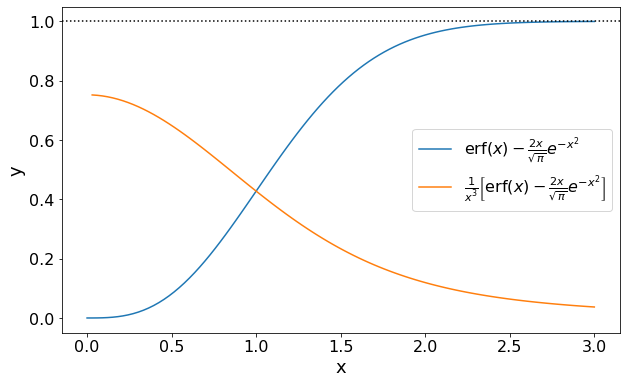

In [46]:
import scipy as sc
import numpy as np
import pylab as plt

x = np.linspace(0,3,100)

f = sc.special.erf(x) - 2*x/np.sqrt(np.pi) * np.exp(-x**2)

str1 = r'$\mathrm{erf}(x) - \frac{2x}{\sqrt{\pi}}e^{-x^2}$'
str2 = r'$\frac{1}{x^3}\left[\mathrm{erf}(x) - \frac{2x}{\sqrt{\pi}}e^{-x^2}\right]$'

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(10,6))

plt.plot(x,f,label=str1)
plt.plot(x,f/x**3,label=str2)

plt.axhline(1,linestyle=":",color="black")

plt.xlabel("x")
plt.ylabel("y")

plt.legend()

plt.show()



writing $\rho = n_0 m$ for the density of smaller objects and considering $M \gg m$, we have the expression for dynamical friction

\begin{equation}
\boxed{
\frac{d\mathbf{v}_M}{dt} = -\frac{4 \pi G^2 \ln\Lambda \rho M }{v_M^3} \left[\mathrm{erf}(x) - \frac{2x}{\sqrt{\pi}} e^{-x^2} \right]\mathbf{v}_M 
}
\end{equation}

This can be written compactly as 

\begin{equation}
\boxed{
\frac{d\mathbf{v}_M}{dt} = -\frac{\mathbf{v}_M}{t_{\rm friction}}
}
\end{equation}

defining the <b>friction time </b>

\begin{equation}
\boxed{
t_{\rm friction} = \frac{v_M^3}{4 \pi G^2 \ln\Lambda \rho M } \left[\mathrm{erf}(x) - \frac{2x}{\sqrt{\pi}} e^{-x^2} \right]^{-1}
}
\end{equation}


#### Approximating $t_{\rm friction}$

Approximating the term in brackets by half 

\begin{equation}
t_{\rm friction} \approx \frac{v^3}{2 \pi G^2 \ln\Lambda \rho M } 
\end{equation}


considering circular orbits, $v = \Omega R$, with $\Omega^2 = GM_G/R^3$ where $M_G$ is the mass of the Galaxy. 

\begin{equation}
t_{\rm friction} \approx \frac{M_G v}{2 R \pi G \ln\Lambda \rho M } 
\end{equation}


Approximating $M_G = 4\pi R^3 \rho/3$ 

\begin{equation}
t_{\rm friction} \approx \frac{2 R^2 v}{3 GM \ln\Lambda  } 
\end{equation}

these approximations are crude, but we find a factor 2/3, which is not far from 1. So, up to a factor of order unity

\begin{equation}
t_{\rm friction} \approx \frac{R^2 v}{GM \ln\Lambda } 
\end{equation}

writing in terms of typical values 

\begin{equation}
t_{\rm fric} \approx \frac{2 \times 10^{11} \ \mathrm{yrs}}{\ln\Lambda} \left(\frac{r}{2 \ \mathrm{kpc}}\right)^2 \left(\frac{v}{250 \ \mathrm{km/s}}\right) \left(\frac{M}{10^6 M_\odot}\right)^{-1}
\end{equation}

Thus, a cloud of $10^6$ Solar masses will experience orbital decay in about $10^{10}$ yrs, which is the age of the Galaxy.


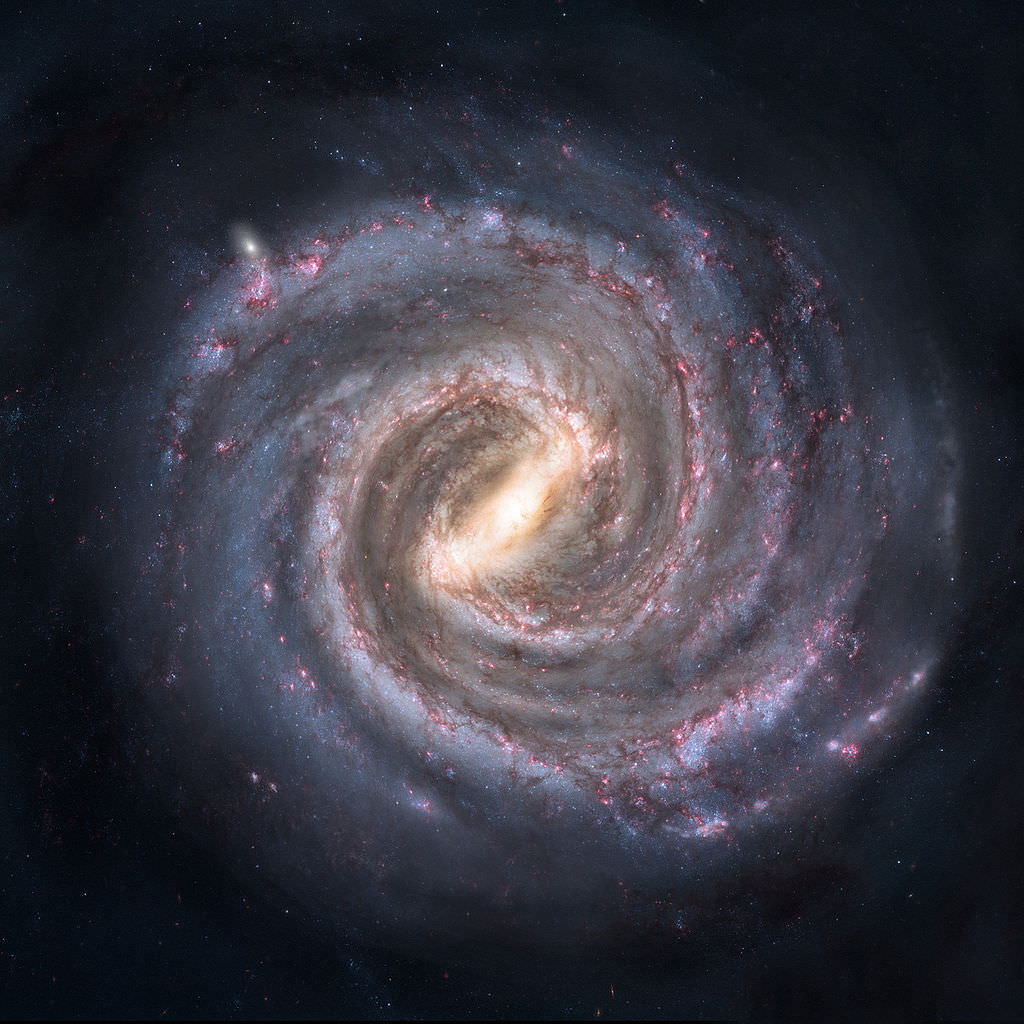